<span style=" font-family: Arial; font-size: 2em;"> Linear Regression Assigment: Geely Auto</span>

by Barkha Saxena

In [213]:
# importing required libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', 190)

import matplotlib.pyplot as plt
import seaborn as sns

In [363]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [214]:
# File paths
car_data_fpath= "CarPrice_Assignment.csv"
data_dict_fpath= "Data Dictionary - carprices.xlsx"

In [215]:
# Importing CarPrice_Assignment.csv
car_df_raw = pd.read_csv(car_data_fpath)

# Creating a copy for analysis
car_df = car_df_raw.copy()

In [216]:
# Checking first 5 rows of car_df
car_df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [217]:
nrows, ncols = car_df.shape
print(f"Car price data has {nrows} rows and {ncols} columns")

Car price data has 205 rows and 26 columns


In [218]:
# Checking if the data types are according to the data dictionary
car_df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [219]:
# pandas read symboling as int64 type but it is actually a categorical variable
car_df["symboling"].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [220]:
# casting symboling column to string type
car_df["symboling"] =car_df["symboling"].astype("str")

# Type casting cylindernumber and doornumber

number_map = {
    "one":1,
    "two":2,
    "three":3,
    "four":4,
    "five":5,
    "six":6,
    "seven":7,
    "eight":8,
    "nine":9,
    "ten":10,
    "eleven":11,
    "twleve":12
}


car_df["cylindernumber"]=car_df["cylindernumber"].map(number_map)
car_df["cylindernumber"] = pd.to_numeric(car_df["cylindernumber"])

car_df["doornumber"] = car_df["doornumber"].map(number_map)
car_df["doornumber"] = pd.to_numeric(car_df["doornumber"])

In [221]:
# Checking for missing values
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    204 non-null    float64
 16  enginesize        205 non-null    int64  
 1

<b> Note: </b>As can be observed, the number of non null values in each column is equal to the total number of rows. Thereby there are no missing values in the data

In [222]:
# Checking for Nan values
car_df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      1
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [223]:
car_df[car_df.isnull().any(axis=1)]["cylindernumber"]

49   NaN
Name: cylindernumber, dtype: float64

In [224]:
# Imputing the cylinder number with the median value as mean can be a decimal value which wouldn't make sense here
car_df.loc[:,"cylindernumber"] = car_df[["cylindernumber"]].apply(lambda x: x.fillna(x.median()))

In [225]:
# checking nans
car_df.isnull().sum().sum()

0

In [226]:
car_df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        6
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [227]:
# Analysing the distributions of numerical variable
car_df.describe(percentiles = [0.10,0.25,0.50,0.75,0.90,0.99]).T

count          mean          std      min       10%  \
car_ID            205.0    103.000000    59.322565     1.00    21.400   
doornumber        205.0      3.121951     0.994966     2.00     2.000   
wheelbase         205.0     98.756585     6.021776    86.60    93.700   
carlength         205.0    174.049268    12.337289   141.10   157.300   
carwidth          205.0     65.907805     2.145204    60.30    63.800   
carheight         205.0     53.724878     2.443522    47.80    50.600   
curbweight        205.0   2555.565854   520.680204  1488.00  1947.000   
cylindernumber    205.0      4.341463     0.939591     2.00     4.000   
enginesize        205.0    126.907317    41.642693    61.00    91.000   
boreratio         205.0      3.329756     0.270844     2.54     2.970   
stroke            205.0      3.255415     0.313597     2.07     2.882   
compressionratio  205.0     10.142537     3.972040     7.00     8.000   
horsepower        205.0    104.117073    39.544167    48.00    68.000   
peakrpm           205.0   5125.121951   476.985643  4150.00  4500.000   
citympg           205.0     25.219512     6.542142    13.00    17.000   
highwaympg        205.0     30.751220     6.886443    16.00    23.000   
price             205.0  13276.710571  7988.852332  5118.00  6657.000   

                      25%       50%       75%        90%        99%       max  
car_ID              52.00    103.00    154.00    184.600    202.960    205.00  
doornumber           2.00      4.00      4.00      4.000      4.000      4.00  
wheelbase           94.50     97.00    102.40    107.900    115.544    120.90  
carlength          166.30    173.20    183.10    188.800    202.480    208.10  
carwidth            64.10     65.50     66.90     68.640     71.700     72.30  
carheight           52.00     54.10     55.50     56.620     59.100     59.80  
curbweight        2145.00   2414.00   2935.00   3230.000   3948.000   4066.00  
cylindernumber       4.00      4.00      4.00      6.000      8.000      8.00  
enginesize          97.00    120.00    141.00    181.000    302.160    326.00  
boreratio            3.15      3.31      3.58      3.672      3.800      3.94  
stroke               3.11      3.29      3.41      3.540      3.900      4.17  
compressionratio     8.60      9.00      9.40     10.940     23.000     23.00  
horsepower          70.00     95.00    116.00    160.000    207.000    288.00  
peakrpm           4800.00   5200.00   5500.00   5780.000   6000.000   6600.00  
citympg             19.00     24.00     30.00     31.600     44.720     49.00  
highwaympg          25.00     30.00     34.00     38.000     49.880     54.00  
price             7788.00  10295.00  16503.00  22563.000  40802.720  45400.00

<b> Note: </b> Observations regarding the distribution of numerical variables from (nunique() and describe())
1. car_ID: all rows have unique values. NOT USEFUL for our analysis.


2. All other variables have mean near to their median except cubeweight, horsepower,ennginesize, compressionratio, peakrpm, and price. Mean away from median indicates skewed nature (not a balanced normal distribution).

In [228]:
# car_ID has non- null 205 unique values => primary key
duplicateRowsDF = car_df[car_df.duplicated('car_ID',keep=False)]
print("All Duplicate Rows based on primary key car_ID column are : "+str( len(duplicateRowsDF)))

All Duplicate Rows based on primary key car_ID column are : 0


# Company name

In [229]:
# target/Dependent variable as mentioned in the problem is price
# As stated : "You need to consider only company name as the independent variable for model building"
# Deriving company name from CarName

extract_company = lambda x: str(x).split(" ")[0].strip()
car_df["company_name"] = car_df["CarName"].apply(extract_company)

car_df["company_name"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

<b> Note: </b> There are spelling mistakes in the company names

Fixing invalid values
There seems to be some spelling error in the CompanyName column.

- maxda = mazda
- Nissan = nissan
- porsche = porcshce
- toyota = toyouta
- vokswagen = volkswagen = vw

In [230]:
car_df["company_name"] = car_df["company_name"].str.lower()

def replace_name(a,b):
    car_df["company_name"].replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

car_df["company_name"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [231]:
# as carID, carname is not required for any further analysis dropping car name from car_Df
# if required later we can get it from car_df_raw 
car_df.drop(columns=["car_ID","CarName"],inplace= True)

# Studying target variable

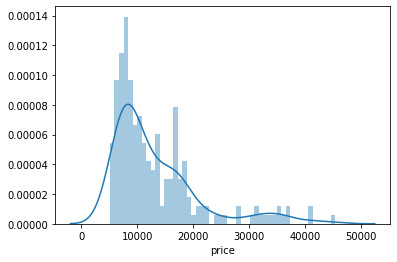

In [232]:
sns.distplot(car_df["price"],bins = 50)

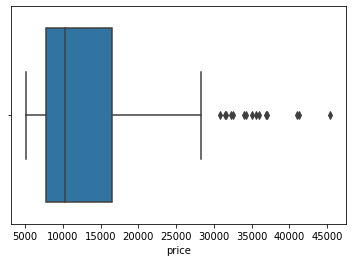

In [233]:
sns.boxplot(car_df["price"])

In [234]:
car_df["price"].describe(percentiles = [0.10,0.25,0.30,0.50,0.75,0.80,0.85,0.90,0.91,0.92,0.95,0.99])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
10%       6657.000000
25%       7788.000000
30%       8022.000000
50%      10295.000000
75%      16503.000000
80%      17493.800000
85%      18500.000000
90%      22563.000000
91%      24316.600000
92%      27336.320000
95%      32472.400000
99%      40802.720000
max      45400.000000
Name: price, dtype: float64

<b> Note: </b>:
- The plot seemed to be left-skewed, meaning that the most prices in the dataset are low(Below 10,000).

- There is a significant difference (around 3000) between the mean and the median of the price distribution.

- About 50% of the prices are below 10295

- The data points are far spread out from the mean, which indicates a high variance in the car prices.(92% of the prices are below 27336, whereas the remaining 9% are between 27336 and 45,400.)

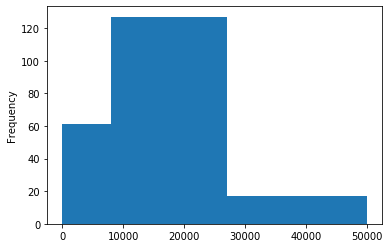

In [235]:
# Based on the distribution and business acumen binning prices in 3 ranges:
# budget-class : 0-8000
# mid-class: 8000-27000
# elite-class: 27000-50000

car_df["price"].plot(kind='hist', bins=[0,8000,27000,50000])

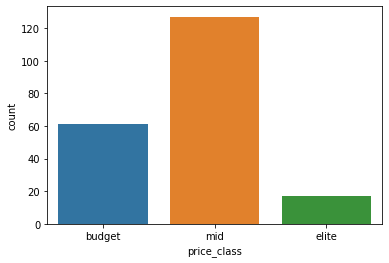

In [236]:
def get_price_class(value):

    if value < 8000:
        price_class = "budget"
    elif value < 27000:
        price_class = "mid"
    else:
        price_class = "elite"

    return price_class


car_df["price_class"] = car_df["price"].apply(get_price_class)
sns.countplot(car_df["price_class"],order=["budget","mid","elite"])

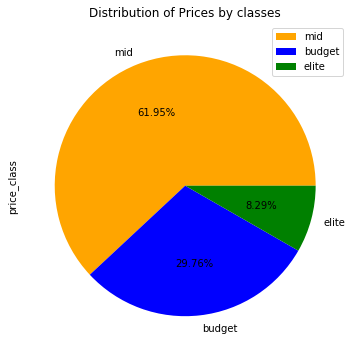

In [237]:
car_df["price_class"].value_counts().plot.pie(autopct='%.2f%%',legend=True, title = "Distribution of Prices by classes", figsize=(7,6),colors=["orange","blue","green"])

# EDA 

## Step 1.1: Univariate Analysis

In [238]:
# def box_plot(col_list, y_axis=None):
#     fig, axes = plt.subplots(1, len(col_list),constrained_layout=True,figsize=(15,5))
#     for i,col in enumerate(col_list):
#         if y_axis:
#             sns.boxplot(x= col,y=y_axis, data=car_df,orient='v',ax=axes[i])
#         else:
#             sns.boxplot(car_df[col],orient='v',ax=axes[i])

In [239]:
def univariate_analysis(col_name, full_name, continuous, sort = True, orientation= 'horizontal'):
    
    """
    Customised function for visualizing a column using car_df
    - col_name is the colum name in the dataframe to be analysed
    - full_name is the full name of the column
    - continuous is True if the variable is continuous, False otherwise
    - sort : if true then sort th bars
    """
    if orientation == 'vertical':
        rows = 2
        cols = 1
        f, ((ax1), (ax2)) = plt.subplots(nrows=rows, ncols=cols, figsize=(12,5), dpi=90)
        plt.xticks(rotation = 90)
        
    else:
        rows =1
        cols =2
        f, (ax1, ax2) = plt.subplots(nrows=rows, ncols=cols, figsize=(12,3), dpi=90)
    
    #plt.xticks(rotation=orientation)
    # Plot without loan status
    if continuous:
        sns.distplot(car_df.loc[car_df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        if sort:
            car_df[col_name].value_counts().plot.pie(ax = ax1, autopct='%.1f%%',legend=True,title=f"Percentage distribution in  {col_name}", textprops={'fontsize': 12},figsize=(10,9))

#             sns.countplot(car_df[col_name], order=sorted(car_df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
        else:
            sns.countplot(car_df[col_name], order=car_df[col_name].unique(), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)
    
    # Plot with loan status
    if continuous:
        sns.boxplot(x=col_name, y='price_class', data=car_df, ax=ax2,order=["budget","mid","elite"])
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by price class')
        print(f"Distribution of {col_name} across price class: \n")
        print(car_df.groupby('price_class')[col_name].describe())
    else:
        sns.boxplot(x=col_name, y='price', data=car_df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by price')
        
#         print(f"Percentage distribution in  {col_name} : \n")
#         print(round(car_df[col_name].value_counts(normalize=True)*100,2))
        print(f"\n\nAverage price across {col_name} : \n")
        print(car_df.groupby(col_name)['price'].mean())
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

### Visualizing Numerical Variables

In [240]:
# extracting list of column names have numeric data type
numeric_cols = [x for x in car_df.select_dtypes(include=np.number).columns.tolist() if x!="price"]
print(f"There are {len(numeric_cols)} numeric columns excluding \"price\"")
numeric_cols

There are 15 numeric columns excluding "price"


['doornumber',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

Distribution of wheelbase across price class: 

             count        mean       std   min   25%    50%    75%    max
price_class                                                              
budget        61.0   94.321311  2.080714  86.6  93.7   94.5   95.7   97.3
elite         17.0  105.252941  9.857429  89.5  98.4  106.7  113.0  120.9
mid          127.0  100.017323  5.243032  88.6  96.3   98.8  103.3  114.2


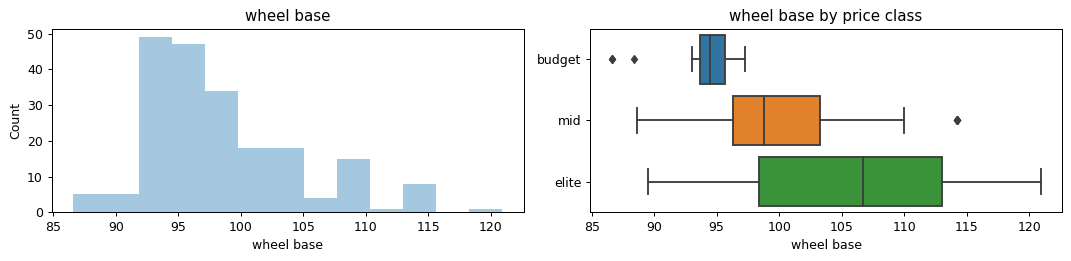

In [241]:
# 1. wheel base 
univariate_analysis("wheelbase","wheel base", True)

<b>Note:</b> Mean price of each price classes has a different wheel base value.It has positive correlation with price. As we move from budget to elite the spread(25 to 75th percentile) of distribution increases towards the higher values of wheel base. Although we can see some overlaps. Even elite class cars (price>2700) seems to have the largest spread ranging from 89.5 to 120.9 (values from the table above the plots)

Distribution of carlength across price class: 

             count        mean        std    min    25%    50%    75%    max
price_class                                                                 
budget        61.0  161.737705   7.425433  141.1  157.3  159.1  166.8  173.5
elite         17.0  189.664706  12.798386  168.9  180.3  191.7  199.6  208.1
mid          127.0  177.872441   8.852358  155.9  172.2  176.2  186.6  198.9


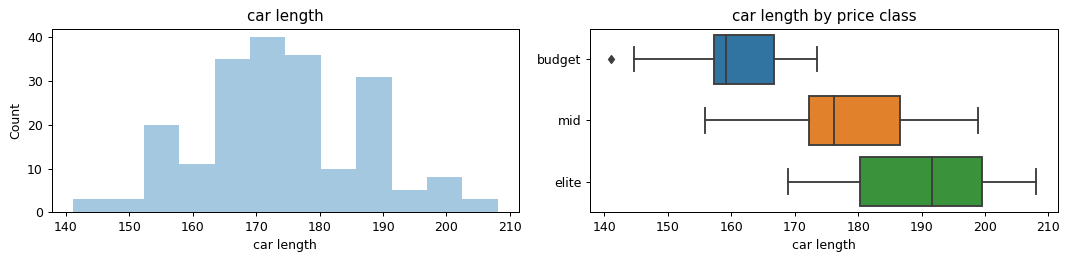

In [242]:
univariate_analysis("carlength","car length", True)

<b>Note:</b> car length is related to price

Distribution of carwidth across price class: 

             count       mean       std   min   25%   50%   75%   max
price_class                                                          
budget        61.0  64.018033  0.801771  60.3  63.8  63.8  64.4  65.5
elite         17.0  69.470588  2.551168  65.0  67.9  70.3  71.7  72.3
mid          127.0  66.338583  1.639979  62.5  65.4  66.3  67.2  71.4


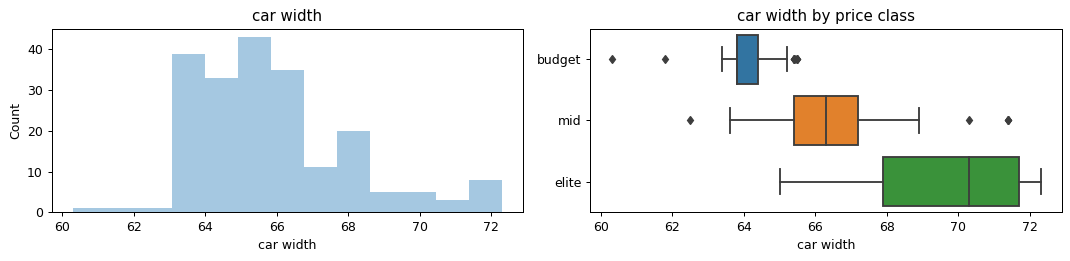

In [243]:
univariate_analysis("carwidth","car width", True)

<b>Note:</b> car width is related to price

Distribution of carheight across price class: 

             count       mean       std   min   25%   50%   75%   max
price_class                                                          
budget        61.0  53.136066  2.049474  50.6  50.8  53.0  54.5  59.1
elite         17.0  53.747059  2.871872  47.8  51.6  53.7  56.3  58.7
mid          127.0  54.004724  2.524416  48.8  52.0  54.3  55.7  59.8


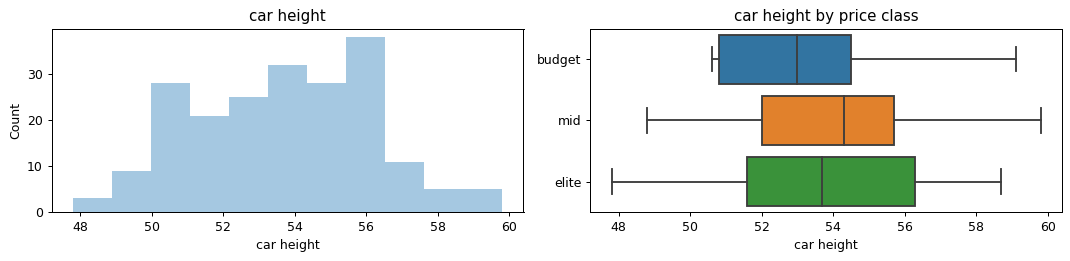

In [244]:
univariate_analysis("carheight","car height", True)

<b>Note:</b> arbitary realtionship. Can't say

Distribution of carwidth across price class: 

             count       mean       std   min   25%   50%   75%   max
price_class                                                          
budget        61.0  64.018033  0.801771  60.3  63.8  63.8  64.4  65.5
elite         17.0  69.470588  2.551168  65.0  67.9  70.3  71.7  72.3
mid          127.0  66.338583  1.639979  62.5  65.4  66.3  67.2  71.4


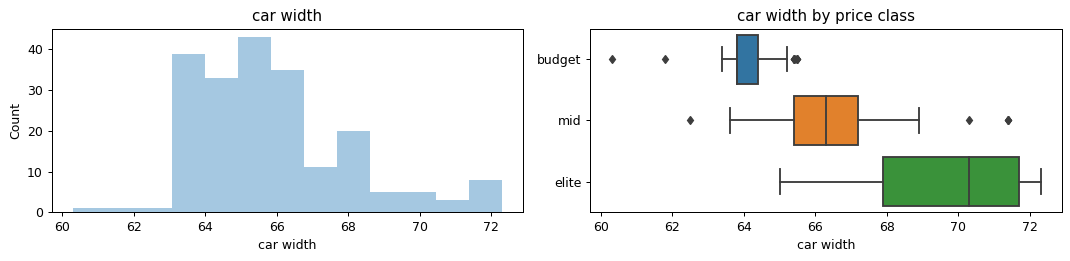

In [245]:
univariate_analysis("carwidth","car width", True)

<b>Note:</b> A clear relationship between carwidth and price

Distribution of curbweight across price class: 

             count         mean         std     min     25%     50%     75%  \
price_class                                                                   
budget        61.0  2034.639344  163.797439  1488.0  1938.0  2010.0  2145.0   
elite         17.0  3525.294118  430.708974  2756.0  3366.0  3685.0  3770.0   
mid          127.0  2675.968504  360.196197  1874.0  2385.0  2650.0  3014.0   

                max  
price_class          
budget       2365.0  
elite        4066.0  
mid          3515.0  


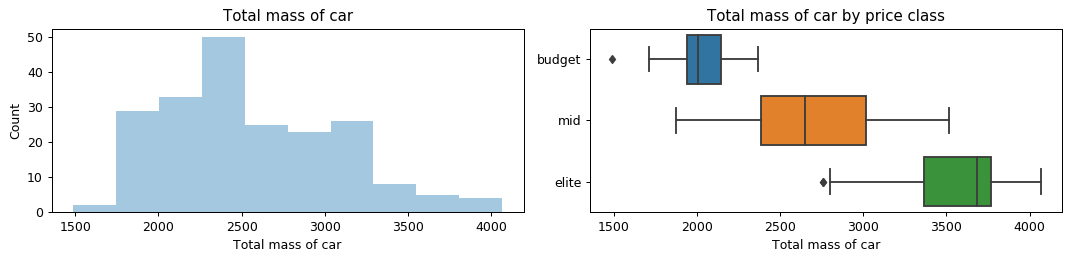

In [246]:
univariate_analysis("curbweight","Total mass of car", True)

<b>Note:</b> A clear relationship between car price and curb weight( mass of car)



Average price across cylindernumber : 

cylindernumber
2.0    13020.000000
3.0     5151.000000
4.0    10446.468750
5.0    21630.469727
6.0    23671.833333
8.0    37400.100000
Name: price, dtype: float64


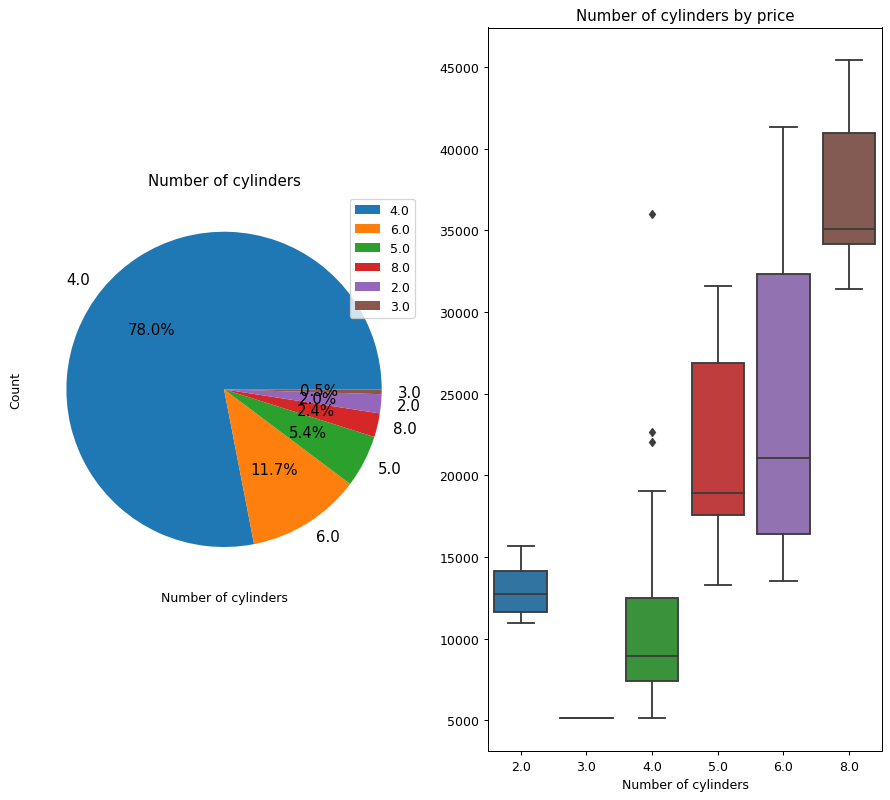

In [247]:
univariate_analysis("cylindernumber","Number of cylinders", False)

<b>Note:</b> Some relationship between car price and number of cylinders

Distribution of enginesize across price class: 

             count        mean        std    min    25%    50%    75%    max
price_class                                                                 
budget        61.0   95.918033   8.839863   61.0   91.0   92.0   98.0  122.0
elite         17.0  228.411765  46.703933  183.0  194.0  209.0  258.0  326.0
mid          127.0  128.204724  25.232676   70.0  109.5  122.0  146.0  183.0


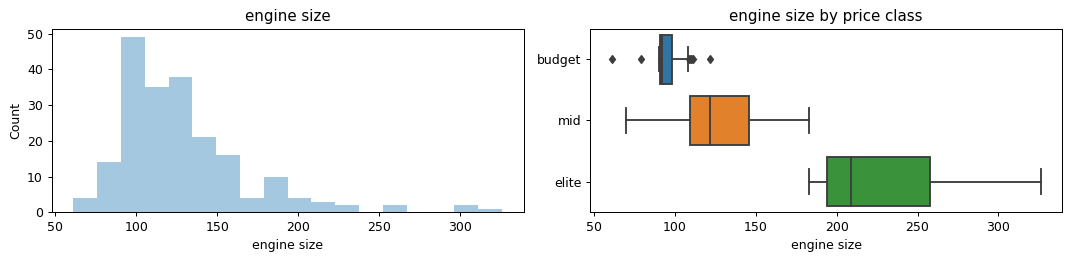

In [248]:
univariate_analysis("enginesize","engine size", True)

<b>Note:</b> A clear relationship can be seen between these price and engine size

Distribution of boreratio across price class: 

             count      mean       std   min   25%   50%   75%   max
price_class                                                         
budget        61.0  3.107705  0.200469  2.91  2.97  3.03  3.15  3.62
elite         17.0  3.651765  0.126453  3.46  3.58  3.62  3.74  3.94
mid          127.0  3.393307  0.235941  2.54  3.19  3.39  3.59  3.94


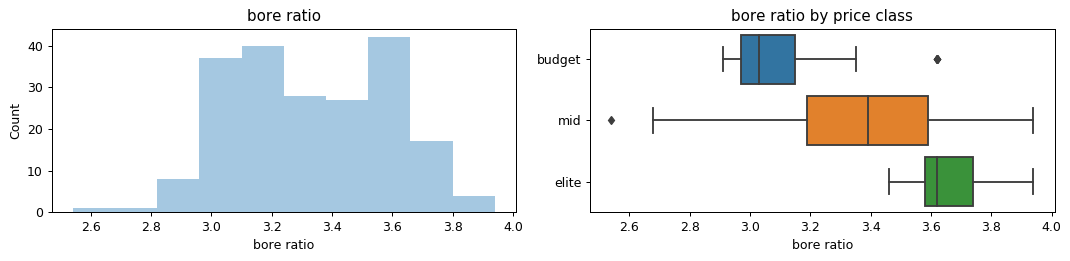

In [249]:
univariate_analysis("boreratio","bore ratio", True)

<b>Note:</b> Almost clear realtionship can be seen between price and bore ratio

Distribution of stroke across price class: 

             count      mean       std   min   25%   50%    75%   max
price_class                                                          
budget        61.0  3.183934  0.240238  2.36  3.07  3.23  3.350  3.58
elite         17.0  3.347059  0.413820  2.76  3.10  3.35  3.640  4.17
mid          127.0  3.277480  0.325417  2.07  3.15  3.35  3.465  3.90


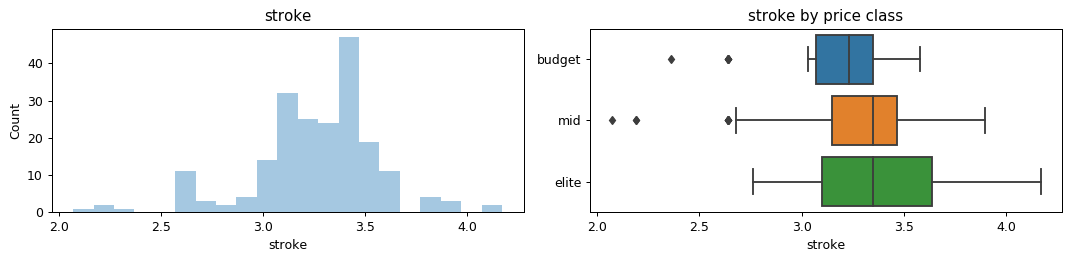

In [250]:
univariate_analysis("stroke","stroke", True)

<b>Note:</b> No clear relationship can be seen between price and stroke (slight increase)

Distribution of compressionratio across price class: 

             count       mean       std  min  25%  50%   75%   max
price_class                                                       
budget        61.0  10.237869  3.747102  7.6  9.0  9.4   9.4  23.0
elite         17.0  11.017647  5.093775  8.0  8.0  8.3  10.0  21.5
mid          127.0   9.979606  3.927915  7.0  8.5  9.0   9.3  23.0


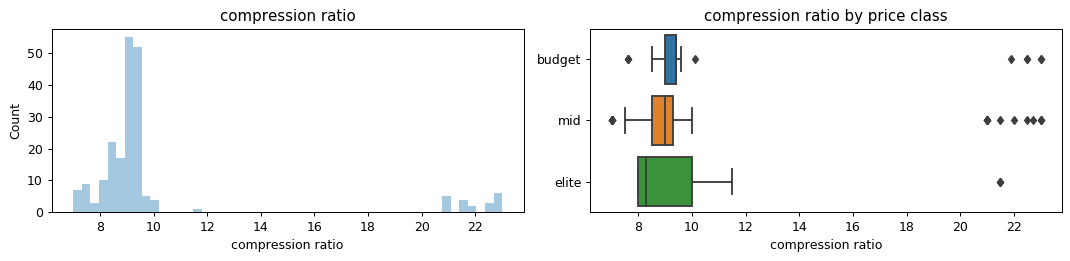

In [251]:
univariate_analysis("compressionratio","compression ratio", True)

<b>Note:</b> No clear relationship can be seen between price and compression ratio

Distribution of horsepower across price class: 

             count        mean        std    min    25%    50%    75%    max
price_class                                                                 
budget        61.0   70.311475  10.766524   48.0   68.0   69.0   73.0  102.0
elite         17.0  183.294118  44.344905  123.0  155.0  182.0  207.0  288.0
mid          127.0  109.755906  28.208610   62.0   90.0  106.0  120.5  200.0


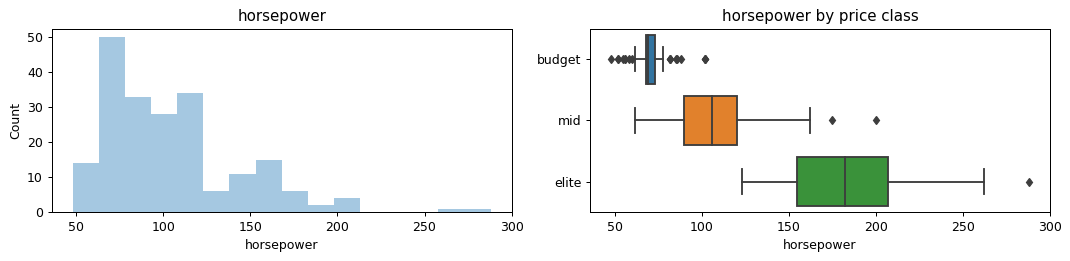

In [252]:
univariate_analysis("horsepower","horsepower", True)

<b>Note:</b> A clear relationship can be seen between price and horsepower

Distribution of peakrpm across price class: 

             count         mean         std     min     25%     50%     75%  \
price_class                                                                   
budget        61.0  5174.590164  421.961980  4400.0  4800.0  5200.0  5500.0   
elite         17.0  5041.176471  584.229004  4350.0  4500.0  4750.0  5400.0   
mid          127.0  5112.598425  487.786078  4150.0  4800.0  5200.0  5500.0   

                max  
price_class          
budget       6000.0  
elite        5900.0  
mid          6600.0  


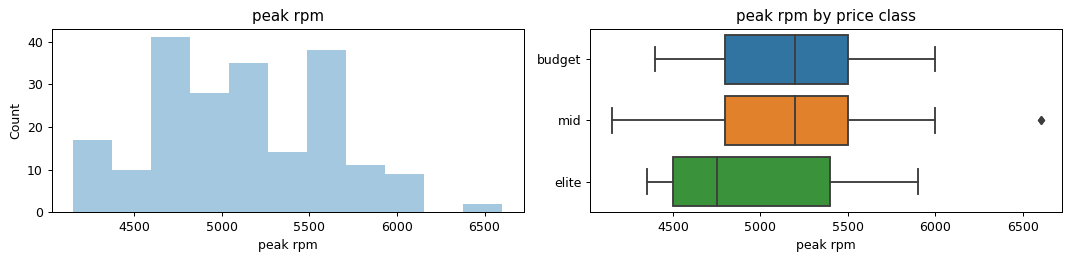

In [253]:
univariate_analysis("peakrpm","peak rpm", True)

<b>Note:</b> No clear relationship can be seen between price and peak rpm

Distribution of citympg across price class: 

             count       mean       std   min   25%   50%   75%   max
price_class                                                          
budget        61.0  31.852459  5.062398  24.0  30.0  31.0  32.0  49.0
elite         17.0  16.705882  2.778595  13.0  15.0  16.0  17.0  22.0
mid          127.0  23.173228  4.561910  16.0  19.0  23.0  26.0  38.0


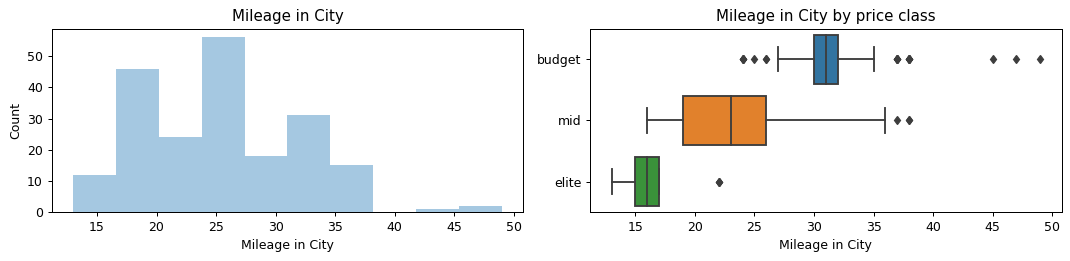

In [254]:
univariate_analysis("citympg","Mileage in City", True)

<b>Note:</b> No clear relationship can be seen between price and city mpg (mileage in city)

Distribution of highwaympg across price class: 

             count       mean       std   min   25%   50%   75%   max
price_class                                                          
budget        61.0  37.721311  5.295064  29.0  34.0  37.0  38.0  54.0
elite         17.0  21.470588  3.842487  16.0  18.0  22.0  25.0  28.0
mid          127.0  28.645669  4.684536  20.0  25.0  28.0  32.0  43.0


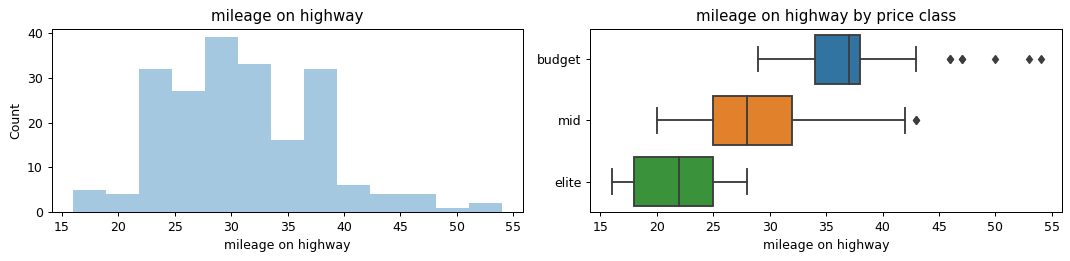

In [255]:
univariate_analysis("highwaympg","mileage on highway", True)

<b>Note:</b> some relationship can be seen between price and highway mpg (mileage on highway)

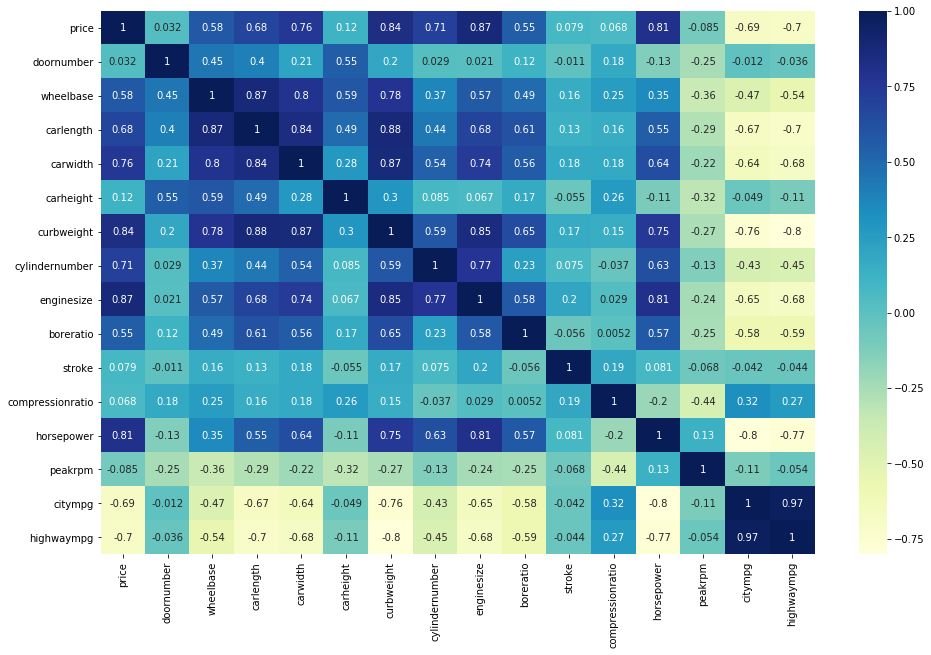

In [256]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(car_df[['price']+numeric_cols].corr(), annot = True, cmap="YlGnBu")
plt.show()

### Visualizing categorical Variables


In [257]:
# Extracting categorical variable
categorical_cols = car_df.select_dtypes(include=["object"]).columns.tolist()
print(f"There are {len(categorical_cols)} categroical columns")
print(categorical_cols)

There are 10 categroical columns
['symboling', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem', 'company_name', 'price_class']




Average price across price_class : 

price_class
budget     6881.163934
elite     34786.088235
mid       13469.379268
Name: price, dtype: float64


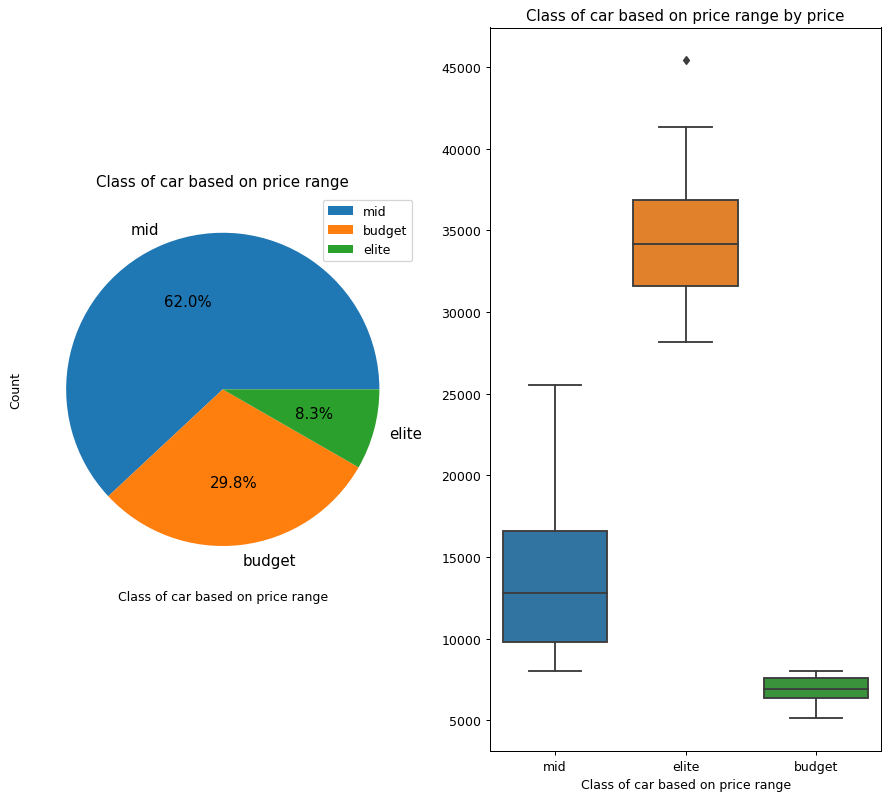

In [258]:
# derived
univariate_analysis("price_class","Class of car based on price range", False)

<b> Note:</b> A clear relationship between price_class and price can be seen



Average price across symboling : 

symboling
-1    17330.681818
-2    15781.666667
0     14366.965179
1     10037.907407
2     10109.281250
3     17221.296296
Name: price, dtype: float64


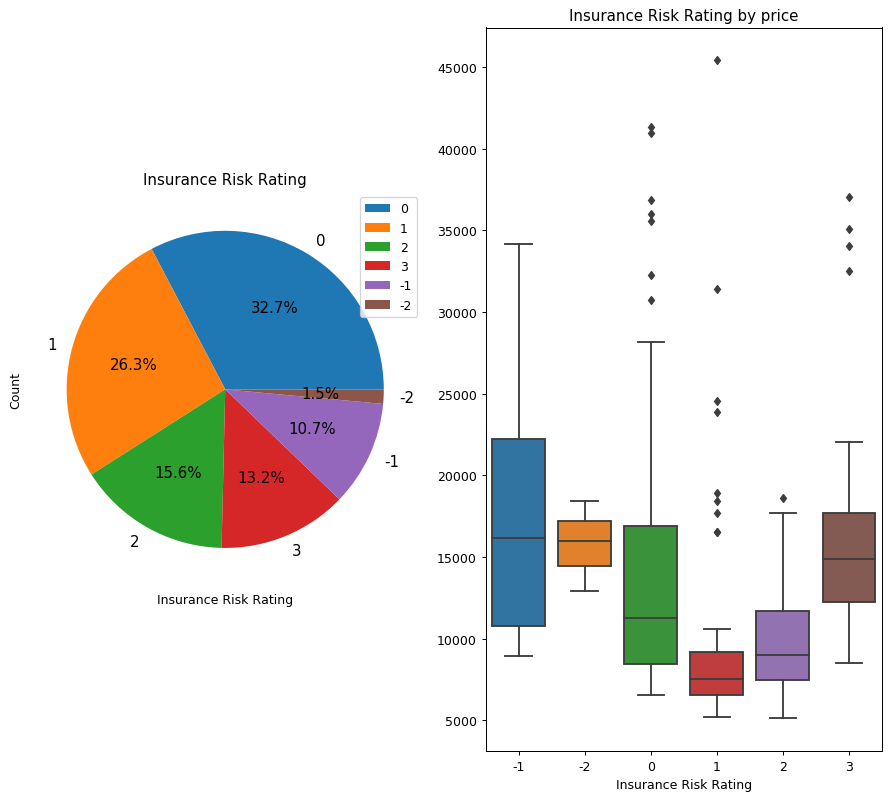

In [259]:
# +3 risky , -3 (safe)
univariate_analysis("symboling","Insurance Risk Rating", False)

<b> Note:</b> some relationship between insurance risk rating and price can be seen



Average price across fueltype : 

fueltype
diesel    15838.1500
gas       12999.7982
Name: price, dtype: float64


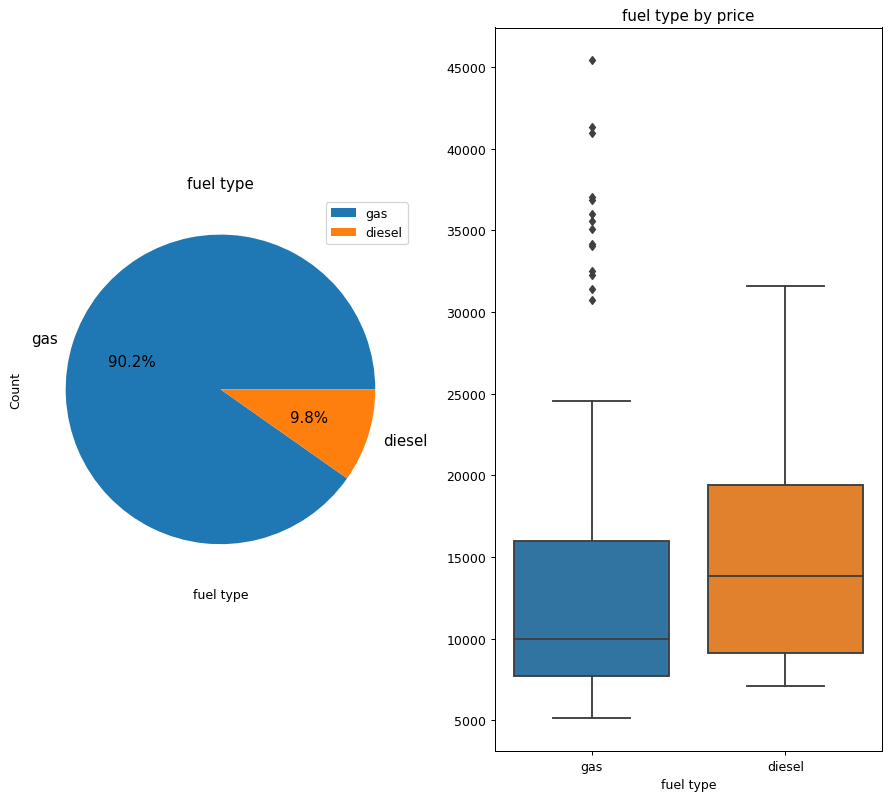

In [260]:
univariate_analysis("fueltype","fuel type", False)

<b> Note:</b> A clear relationship between fuel type and price can be seen. 90% data point have gas.



Average price across aspiration : 

aspiration
std      12611.270833
turbo    16298.166676
Name: price, dtype: float64


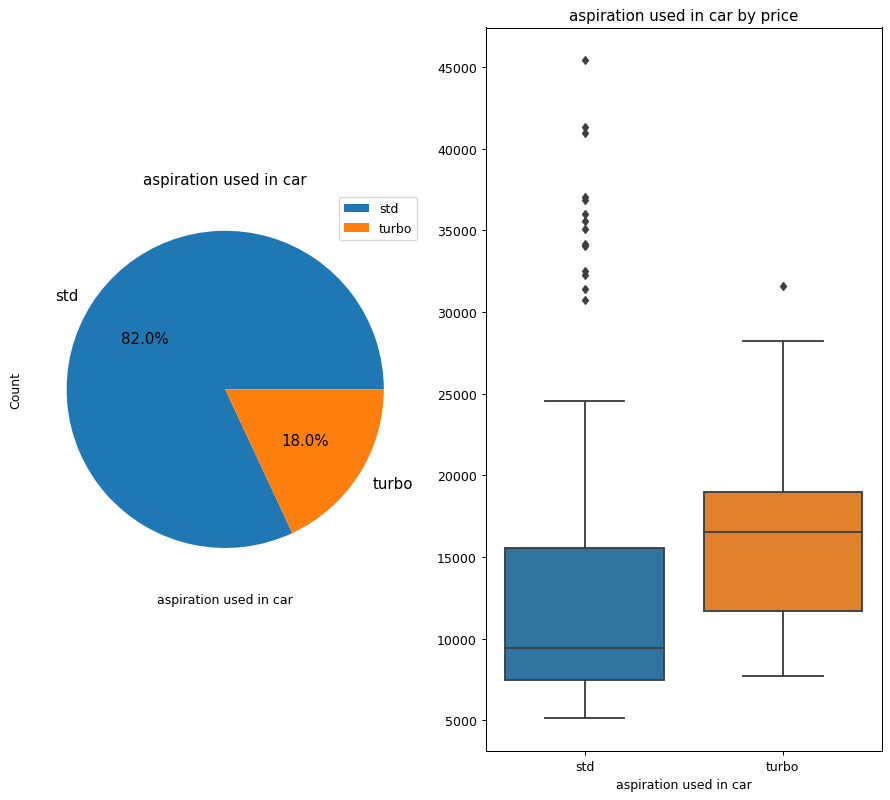

In [261]:
univariate_analysis("aspiration","aspiration used in car", False)

<b> Note:</b> A clear relationship between aspiration and price can be seen



Average price across doornumber : 

doornumber
2    12989.924078
4    13501.152174
Name: price, dtype: float64


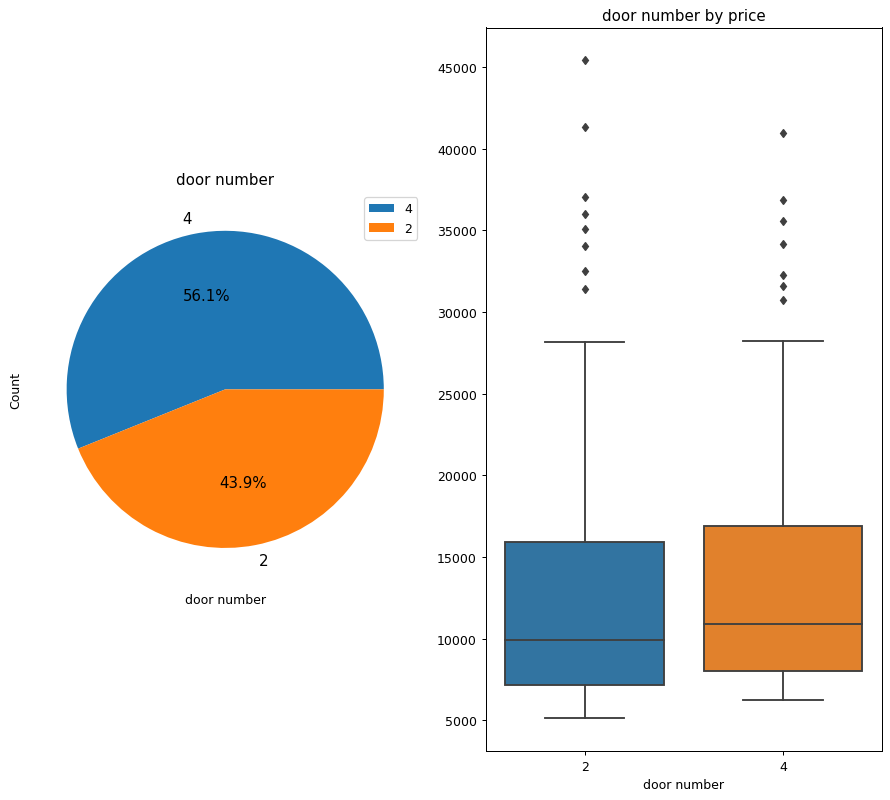

In [262]:
univariate_analysis("doornumber","door number", False)

<b> Note:</b> Not much relationship between door number and price can be seen



Average price across carbody : 

carbody
convertible    21890.500000
hardtop        22208.500000
hatchback      10376.652386
sedan          14344.270833
wagon          12371.960000
Name: price, dtype: float64


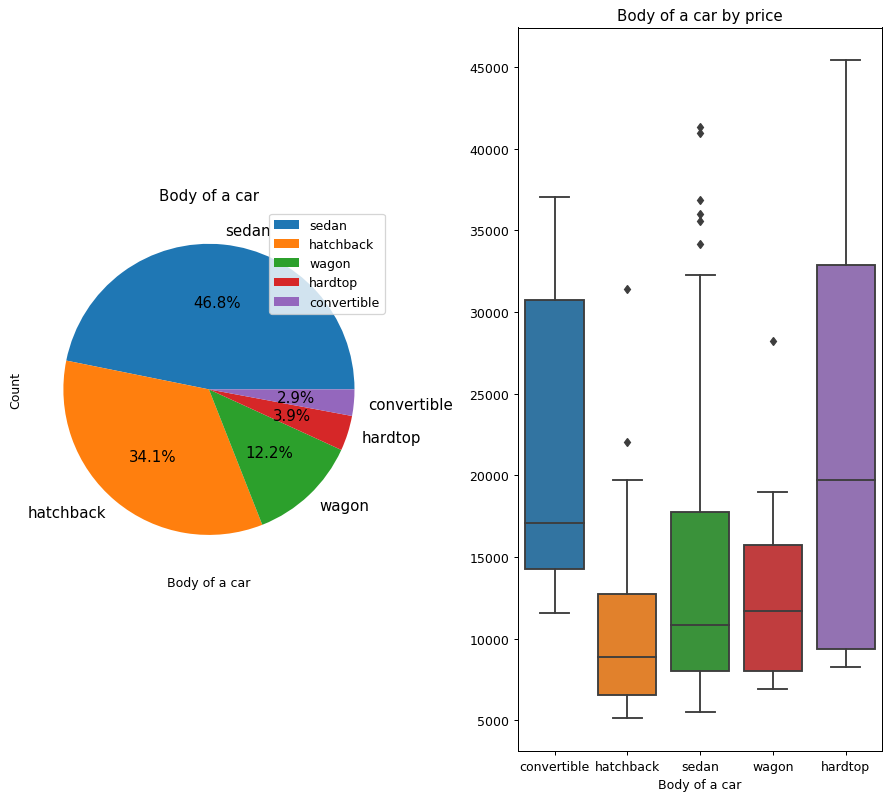

In [263]:
univariate_analysis("carbody","Body of a car", False)

<b> Note:</b> Some relationship between type of car body and price can be seen. Sedan seems to be the most popular car



Average price across drivewheel : 

drivewheel
4wd    11087.463000
fwd     9239.308333
rwd    19910.809211
Name: price, dtype: float64


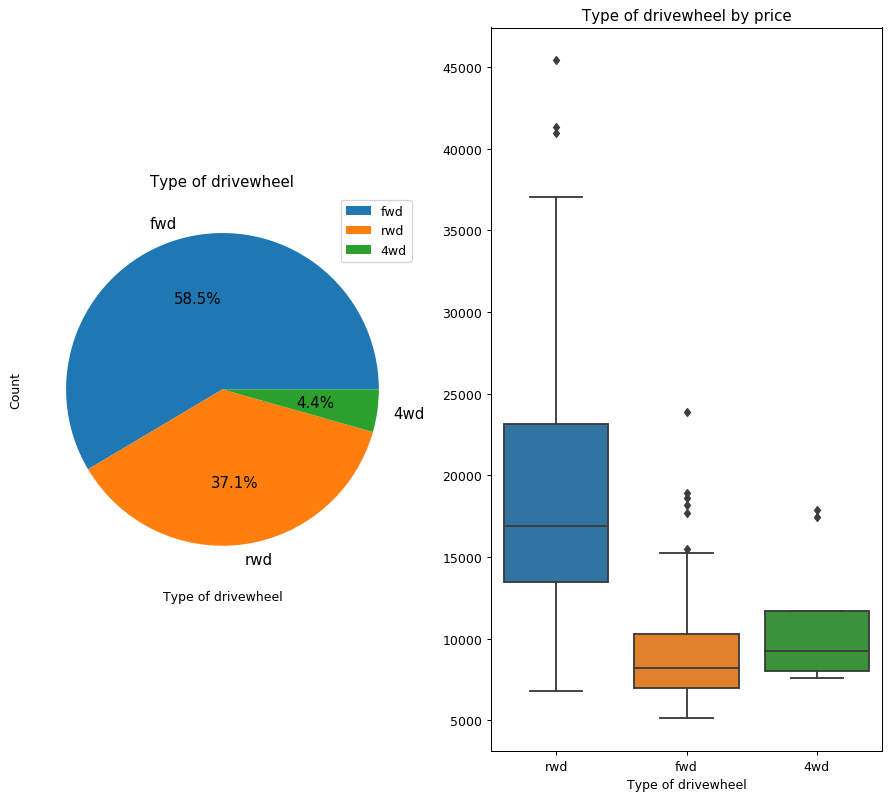

In [264]:
univariate_analysis("drivewheel","Type of drivewheel", False)

<b> Note:</b> some relationship between type of drivewheel and price can be seen



Average price across enginelocation : 

enginelocation
front    12961.097361
rear     34528.000000
Name: price, dtype: float64


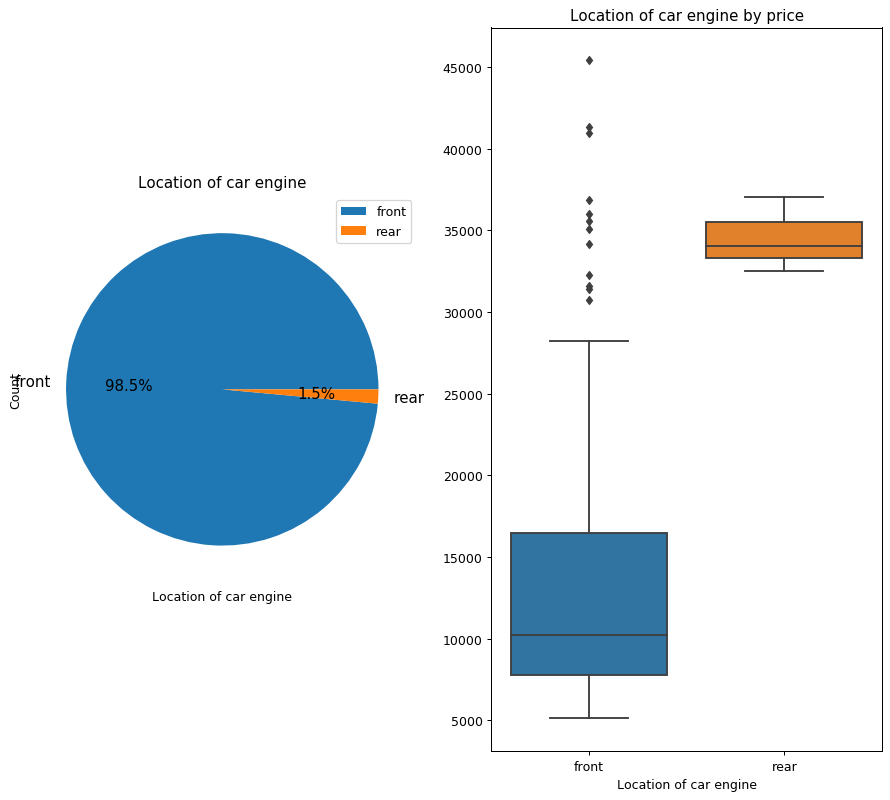

In [265]:
univariate_analysis("enginelocation","Location of car engine", False)

<b> Note:</b> A clear relationship between location of engine and price can be seen



Average price across cylindernumber : 

cylindernumber
2.0    13020.000000
3.0     5151.000000
4.0    10446.468750
5.0    21630.469727
6.0    23671.833333
8.0    37400.100000
Name: price, dtype: float64


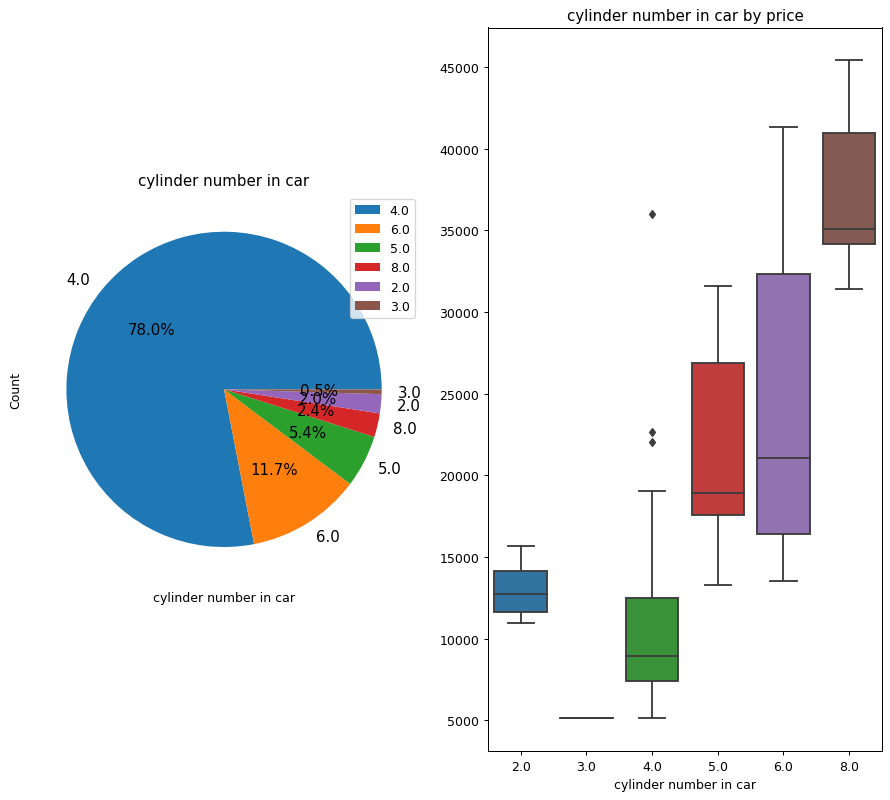

In [266]:
univariate_analysis("cylindernumber","cylinder number in car", False)

<b> Note:</b> some relationship between number of cylinder and price can be seen



Average price across fuelsystem : 

fuelsystem
1bbl     7555.545455
2bbl     7478.151515
4bbl    12145.000000
idi     15838.150000
mfi     12964.000000
mpfi    17754.602840
spdi    10990.444444
spfi    11048.000000
Name: price, dtype: float64


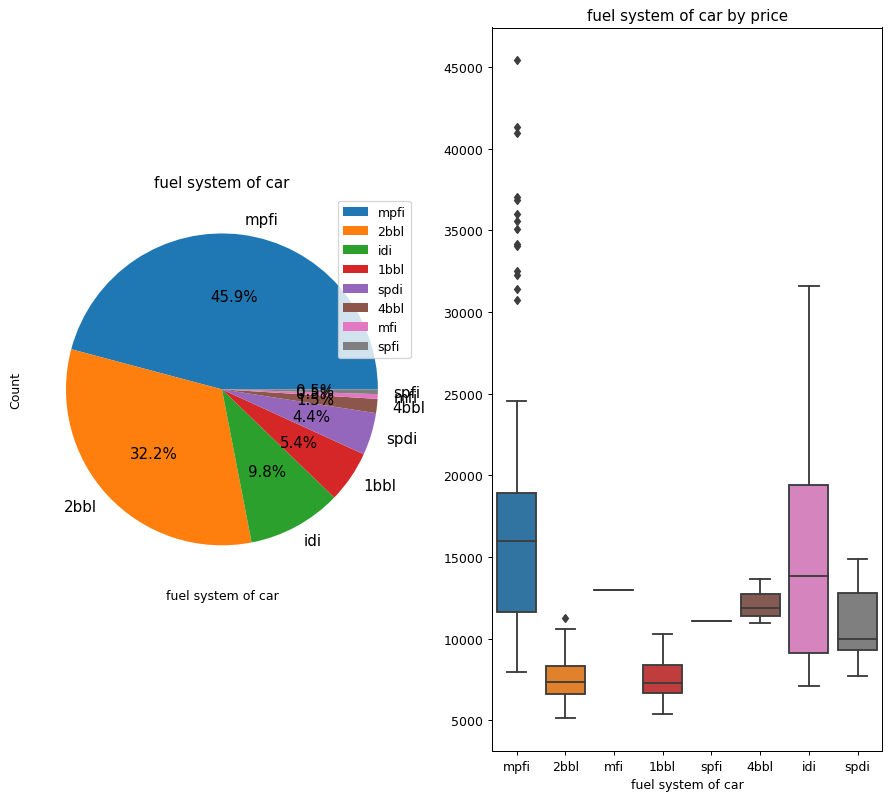

In [267]:
univariate_analysis("fuelsystem","fuel system of car", False)

<b> Note:</b> some relationship between feul system and price can be seen



Average price across company_name : 

company_name
alfa-romero    15498.333333
audi           17859.166714
bmw            26118.750000
buick          33647.000000
chevrolet       6007.000000
dodge           7875.444444
honda           8184.692308
isuzu           8916.500000
jaguar         34600.000000
mazda          10652.882353
mercury        16503.000000
mitsubishi      9239.769231
nissan         10415.666667
peugeot        15489.090909
plymouth        7963.428571
porsche        31400.500000
renault         9595.000000
saab           15223.333333
subaru          8541.250000
toyota          9885.812500
volkswagen     10077.500000
volvo          18063.181818
Name: price, dtype: float64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 22 Text xticklabel objects>)

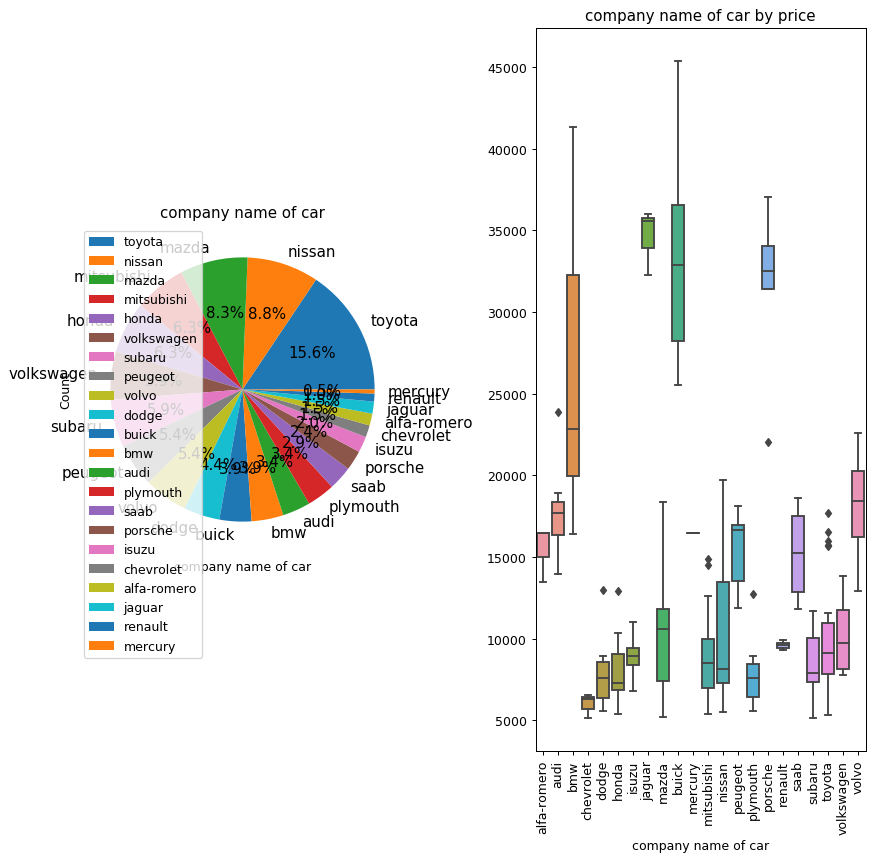

In [268]:
univariate_analysis("company_name","company name of car", False)
plt.xticks(rotation=90)

<b> Note:</b> Some relationship between company name and price can be seen. Nissan seems to be the most popular company (8.8%)

## Step 1.2:  Bivariate analysis

In [269]:
features = [x for x in car_df.columns if x !='price']
print("Potential Features :")
print(features)

def price_versus(col_list):
    sns.pairplot(data=car_df,
                  y_vars=['price'],
                  x_vars=col_list,height=4)

#     plt.tight_layout()

Potential Features :
['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'company_name', 'price_class']


### Visualizing numerical variables

plotting column 0 to 4 out of 26
plotting column 4 to 8 out of 26
plotting column 8 to 12 out of 26
plotting column 12 to 16 out of 26
plotting column 16 to 20 out of 26
plotting column 20 to 24 out of 26
plotting column 24 to 26 out of 26


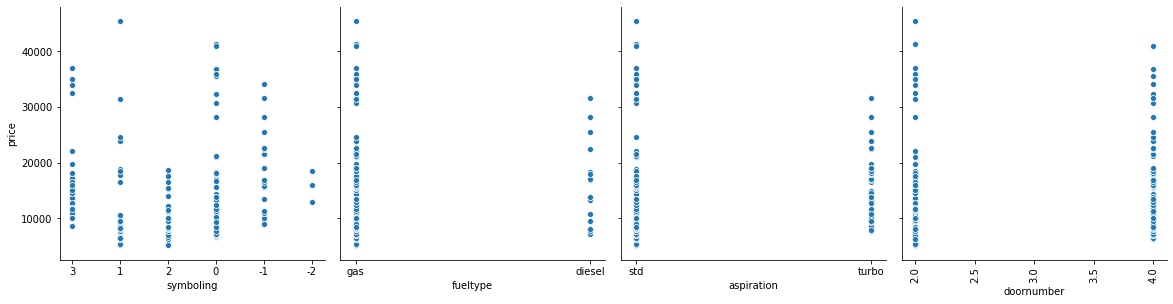

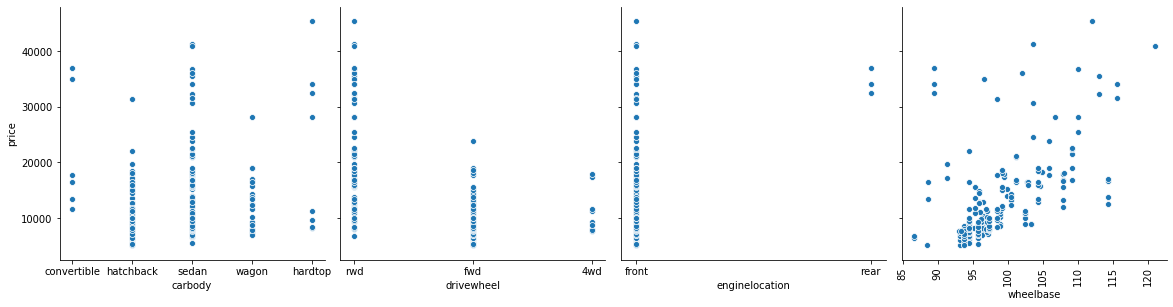

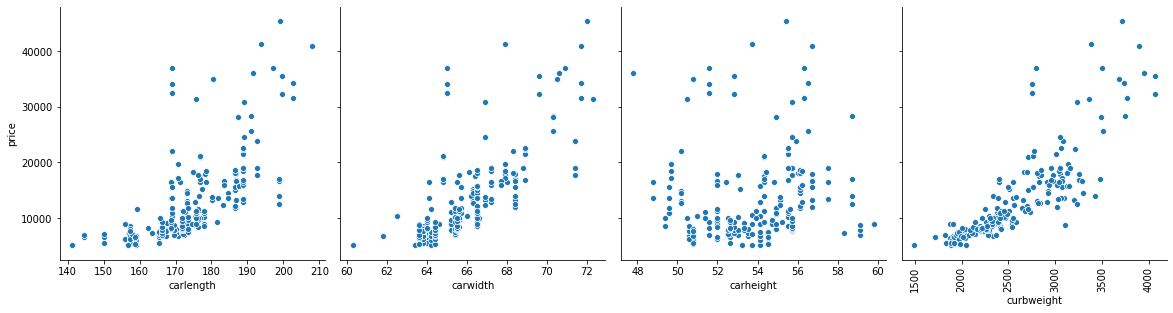

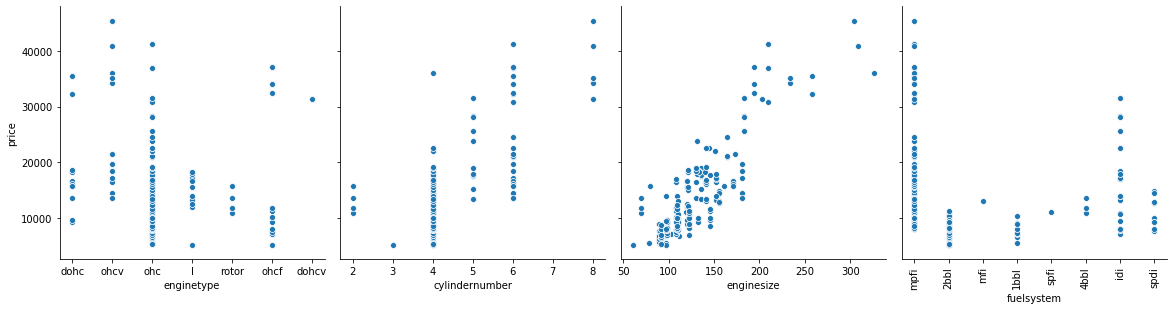

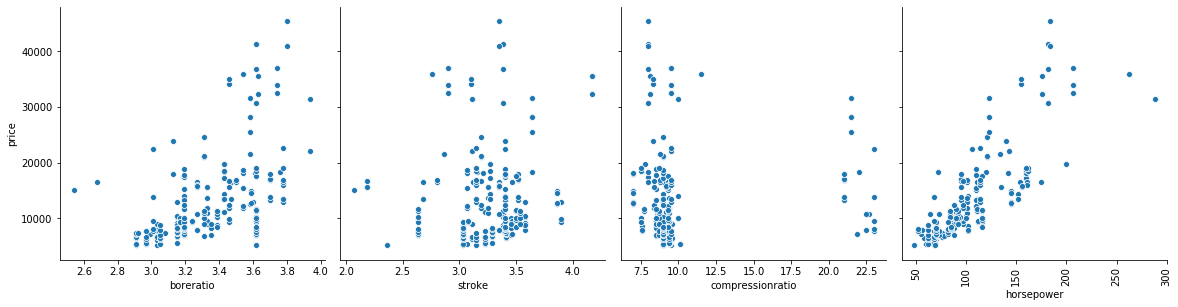

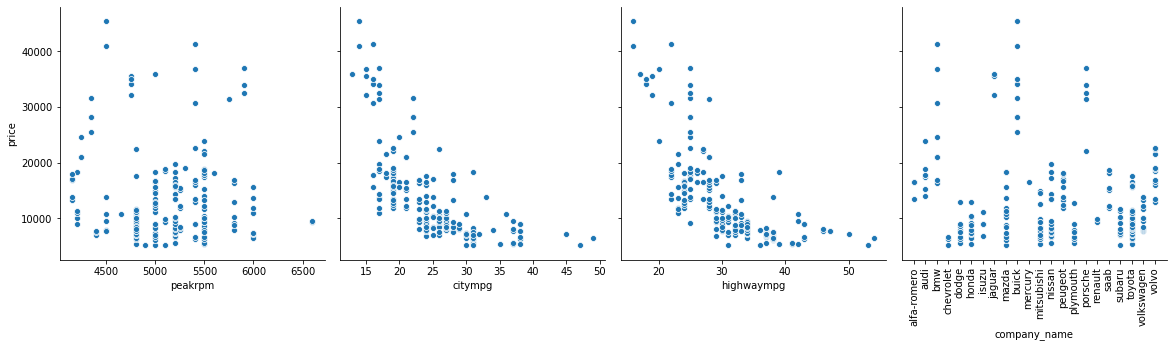

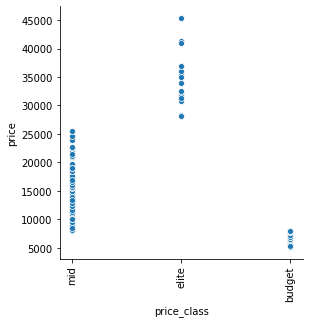

In [270]:
for i in range(0,len(car_df.columns)-1,4):
    end = i+4
    if end >= len(car_df.columns):
        end = len(car_df.columns)
    print(f"plotting column {i} to {end} out of {len(car_df.columns)}")
    price_versus(features[i:end])
    plt.xticks(rotation = 90)

We can see a good correlation between price and 

    positve correlation:
    - wheelbase
    - carlength
    - carwidth
    - curbweight
    - enginesize
    - horsepower
    
    negative correlation
    - citympg
    - highwaympg

among all other numeric variables

### Visualizing categorical Variables


In [271]:
categorical_cols = car_df.select_dtypes(include=["object"]).columns.tolist()
categorical_cols

['symboling',
 'fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'fuelsystem',
 'company_name',
 'price_class']

In [272]:
def box_plot(col_list,y_axis = None):
    fig, axes = plt.subplots(1, len(col_list),constrained_layout=True,figsize=(15,5))
    for i,col in enumerate(col_list):
        if y_axis:
            sns.boxplot(x=col,y = y_axis,data=car_df, orient='v',ax=axes[i])
        else:
            sns.boxplot(car_df[col],orient='v',ax=axes[i])
def see_categorical_col_group(g):
    batch_size = 4
    ncols =len(categorical_cols)
    i= g*batch_size
    if i <=  ncols:
        end =i+batch_size
        if g>0 and end>=ncols:
            end = ncols
        box_plot(categorical_cols[i:end],y_axis = 'price')
        plt.xticks(rotation = 90)
    else:
        print("out of index")

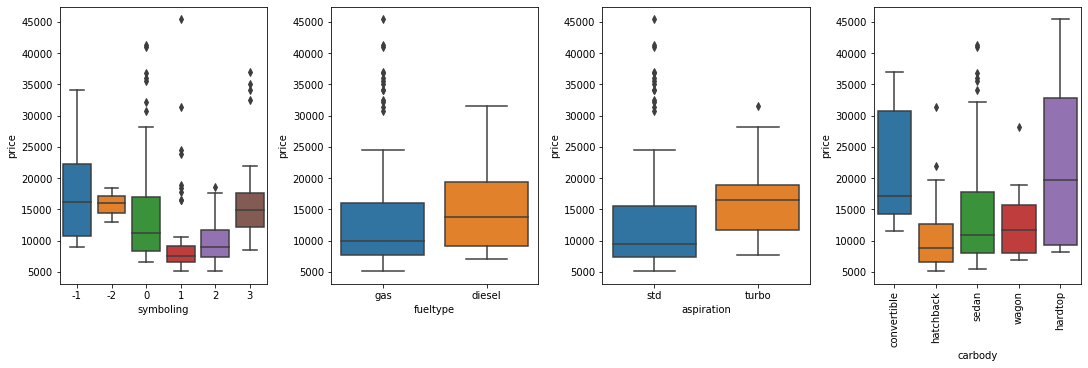

In [273]:
see_categorical_col_group(0)

<b> Note: </b>
The mean of Price in sub categories varies significantly in features:
    - symboling
    - fueltype
    - aspiration
    - carbody (convertible , hardtop and others)

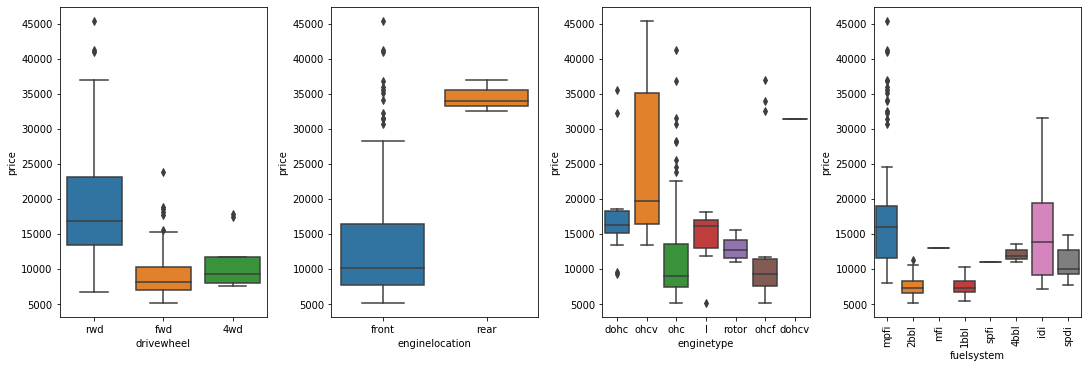

In [274]:
see_categorical_col_group(1)

<b> Note: </b>
The mean of Price varies significantly with:
    
    - drivewheel (rwd and others)
    - enginelocation
    - enginetype (ohcv, (ohc and motor), (dohc, I and rotor) and others)

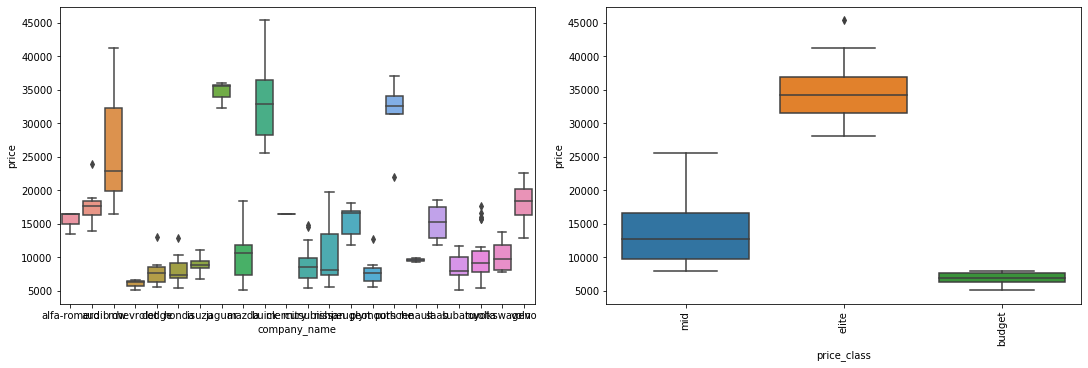

In [275]:
see_categorical_col_group(2)

<b> Note: </b>
The mean of Price varies significantly with:
    - cylindernumber
    - fuelsystem
    - company_name

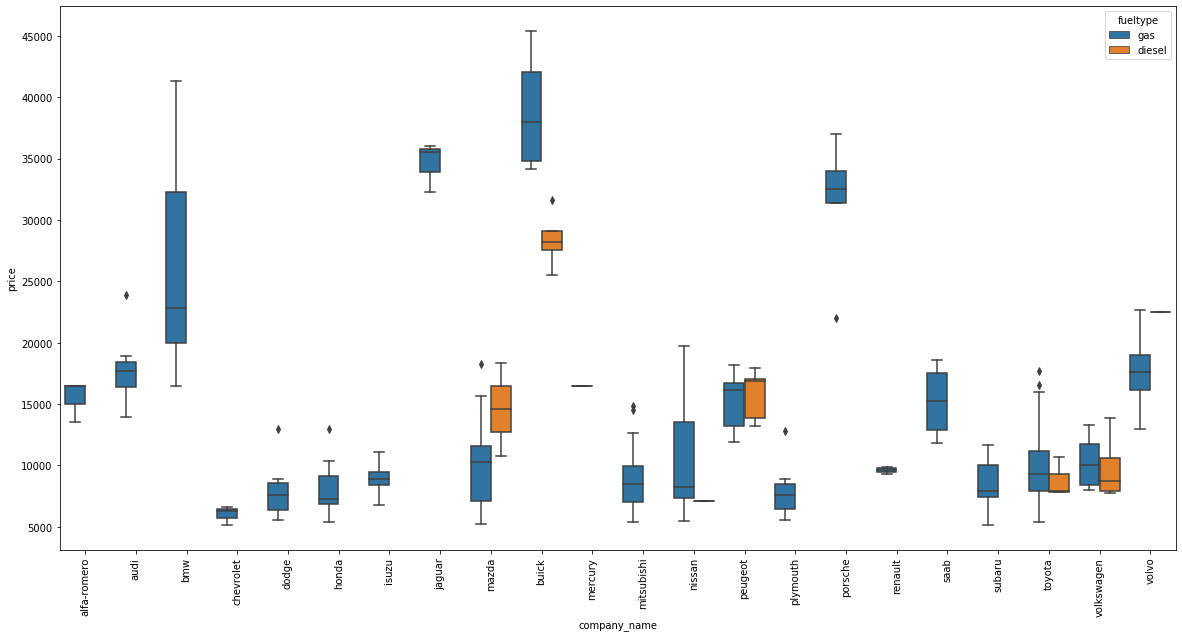

In [276]:
plt.figure(figsize = (20, 10))
sns.boxplot(x = 'company_name', y = 'price', hue = 'fueltype', data = car_df)
plt.xticks(rotation=90)
plt.show()

<b>Note: </b>
Some Companies only sell cars with gas fuel type. Something peculiar can be seen (a dash ) for mercury and volvo. Either all the data points have same price value or there is only one data point.Let's explore

In [277]:
car_df[car_df["company_name"]=="mercury"]

symboling fueltype aspiration  doornumber    carbody drivewheel  \
75         1      gas      turbo           2  hatchback        rwd   

   enginelocation  wheelbase  carlength  carwidth  ...  boreratio  stroke  \
75          front      102.7      178.4      68.0  ...       3.78    3.12   

   compressionratio  horsepower  peakrpm citympg  highwaympg    price  \
75              8.0         175     5000      19          24  16503.0   

    company_name  price_class  
75       mercury          mid  

[1 rows x 26 columns]

In [278]:
car_df[(car_df["company_name"]=="volvo") & (car_df["fueltype"]=="diesel")]

symboling fueltype aspiration  doornumber carbody drivewheel  \
203        -1   diesel      turbo           4   sedan        rwd   

    enginelocation  wheelbase  carlength  carwidth  ...  boreratio  stroke  \
203          front      109.1      188.8      68.9  ...       3.01     3.4   

    compressionratio  horsepower  peakrpm citympg  highwaympg    price  \
203             23.0         106     4800      26          27  22470.0   

     company_name  price_class  
203         volvo          mid  

[1 rows x 26 columns]

There is only one row. This explains the dashes

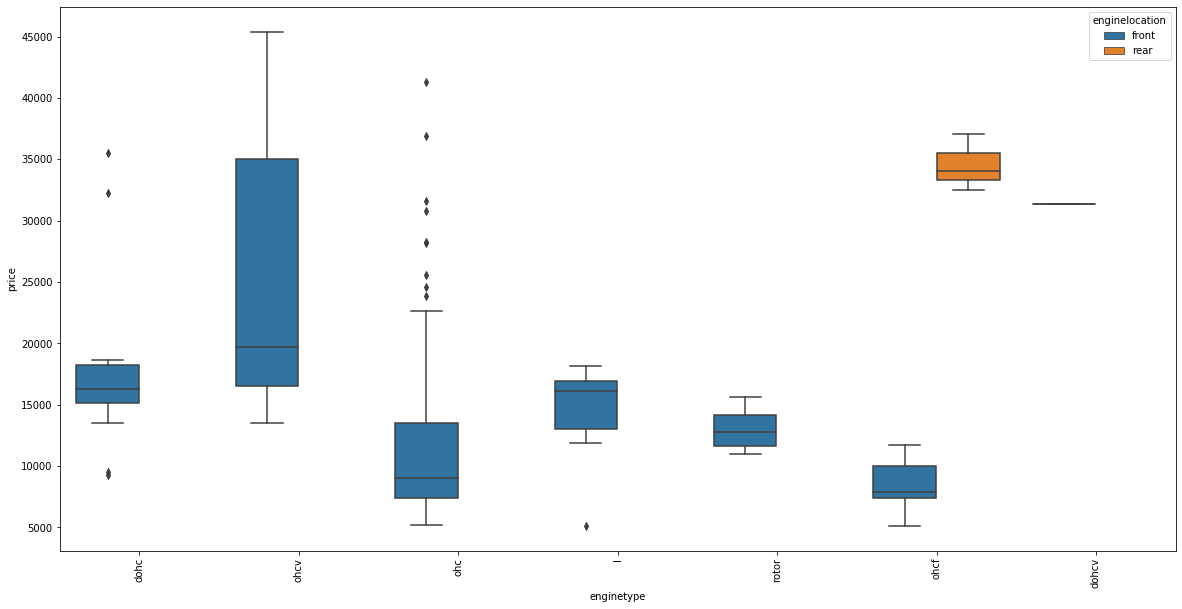

In [279]:
plt.figure(figsize = (20, 10))
sns.boxplot(x = 'enginetype', y = 'price', hue = 'enginelocation', data = car_df)
plt.xticks(rotation=90)
plt.show()

<b> Note</b> 
Seems like engine type explains the engine location very well

## Step 2: Adding Derived cols

Distribution of cuboidal_volume across price class: 

             count           mean           std         min         25%  \
price_class                                                               
budget        61.0  550704.567279  41464.868211  452643.156  509815.592   
elite         17.0  711087.972353  92642.651291  566490.600  645726.420   
mid          127.0  639023.465236  67145.194728  507808.444  581787.936   

                    50%         75%         max  
price_class                                      
budget       552589.302  574764.630  637861.572  
elite        723650.625  787769.849  846007.659  
mid          629188.560  696139.290  798599.412  


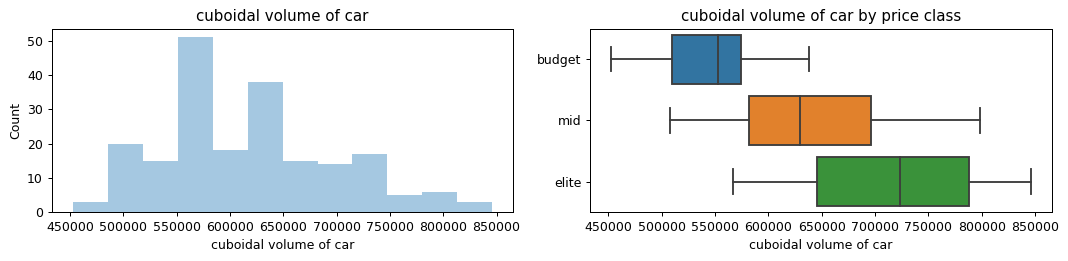

In [280]:
# cuboidal_volume = carwidth *carlength *carheight

car_df["cuboidal_volume"] = car_df["carwidth"]*car_df["carlength"]*car_df["carheight"]
univariate_analysis("cuboidal_volume","cuboidal volume of car",True)

Distribution of engine_size_per_cylinder across price class: 

             count       mean        std     min        25%        50%   75%  \
price_class                                                                    
budget        61.0  24.062842   1.956628  19.750  22.750000  23.000000  24.5   
elite         17.0  37.598529  12.208021  25.375  32.333333  34.833333  38.0   
mid          127.0  30.393045   4.336105  22.500  27.250000  30.166667  33.5   

              max  
price_class        
budget       30.5  
elite        81.5  
mid          40.0  


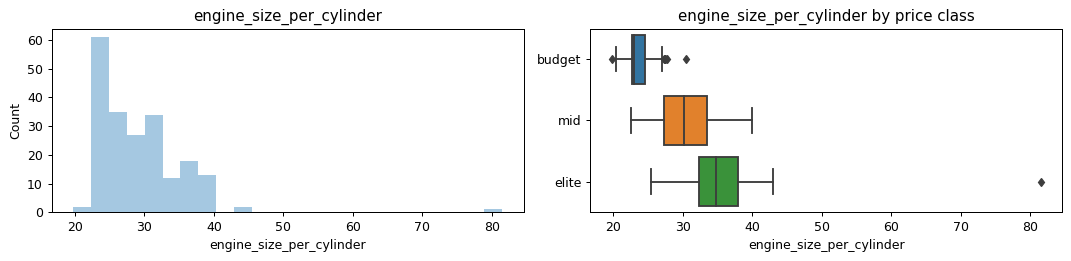

In [281]:
# engine_size_per_cylinder = engine_size / cylindernumber

car_df["engine_size_per_cylinder"] = car_df["enginesize"] / car_df["cylindernumber"]
univariate_analysis("engine_size_per_cylinder","engine_size_per_cylinder",True)

Distribution of weighted_average_mileage across price class: 

             count       mean       std   min   25%   50%   75%   max
price_class                                                          
budget        61.0  34.200000  5.099412  26.0  31.6  33.8  34.0  51.0
elite         17.0  18.611765  2.968561  14.6  16.6  18.4  20.2  23.2
mid          127.0  25.362205  4.554902  18.2  21.4  25.6  28.4  40.0


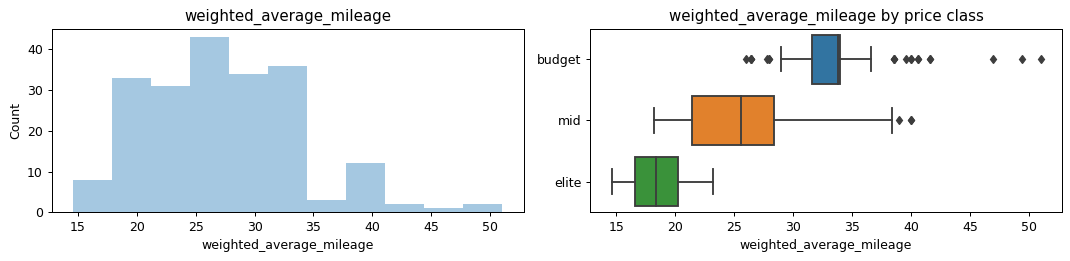

In [282]:
# weighted_average_mileage = 0.6 *citympg +( 0.4 * highwaympg )
# Assumption: 60% usage is in cities and 40% usage on highways

car_df["weighted_average_mileage"] = (0.6 * car_df["citympg"] ) + (0.4 * car_df["highwaympg"]) 
univariate_analysis("weighted_average_mileage","weighted_average_mileage", True)

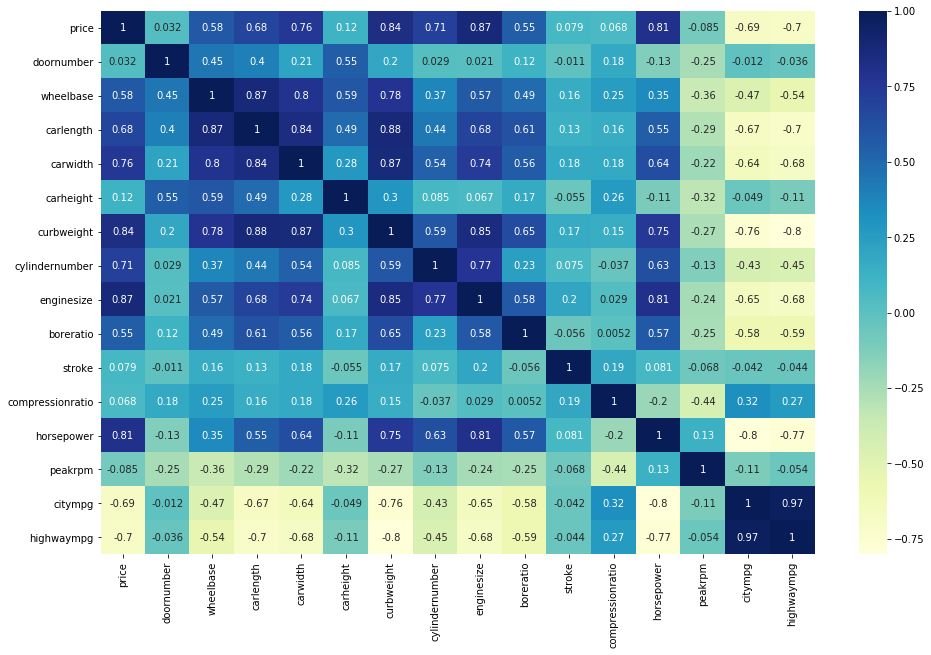

In [283]:
plt.figure(figsize = (16, 10))
sns.heatmap(car_df[['price']+numeric_cols].corr(), annot = True, cmap="YlGnBu")
plt.show()

## Step 3: Data Preparation

In [284]:
# create dummies or convert to numeric
categorical_cols = car_df.select_dtypes(include=["object"]).columns.tolist()
categorical_cols

['symboling',
 'fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'fuelsystem',
 'company_name',
 'price_class']

In [285]:
car_df[categorical_cols].sample(2)

symboling fueltype aspiration    carbody drivewheel enginelocation  \
52          1      gas        std  hatchback        fwd          front   
181        -1      gas        std      wagon        rwd          front   

    enginetype fuelsystem company_name price_class  
52         ohc       2bbl        mazda      budget  
181       dohc       mpfi       toyota         mid

Categorical features:

    Ordinal:
        - symboling
    Nominal:
        - fueltype
        - aspiration
        - carbody
        - drivewheel
        - enginelocation
        - enginetype
        - fuelsystem
        - company_name
        - price_class (derived)

In [286]:
# converting ordinal to numeric 
# Assumption: they are equally spaced
car_df.symboling.unique()

array(['3', '1', '2', '0', '-1', '-2'], dtype=object)

In [287]:
car_df.symboling = pd.to_numeric(car_df.symboling)

In [288]:
# verifying
car_df.symboling.unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [289]:
# create dummies or convert to numeric
categorical_cols = car_df.select_dtypes(include=["object"]).columns.tolist()
categorical_cols

['fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'fuelsystem',
 'company_name',
 'price_class']

In [290]:
dummies_col = pd.get_dummies(car_df[categorical_cols], drop_first = True).columns.tolist()
dummies_col

['fueltype_gas',
 'aspiration_turbo',
 'carbody_hardtop',
 'carbody_hatchback',
 'carbody_sedan',
 'carbody_wagon',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'enginelocation_rear',
 'enginetype_dohcv',
 'enginetype_l',
 'enginetype_ohc',
 'enginetype_ohcf',
 'enginetype_ohcv',
 'enginetype_rotor',
 'fuelsystem_2bbl',
 'fuelsystem_4bbl',
 'fuelsystem_idi',
 'fuelsystem_mfi',
 'fuelsystem_mpfi',
 'fuelsystem_spdi',
 'fuelsystem_spfi',
 'company_name_audi',
 'company_name_bmw',
 'company_name_buick',
 'company_name_chevrolet',
 'company_name_dodge',
 'company_name_honda',
 'company_name_isuzu',
 'company_name_jaguar',
 'company_name_mazda',
 'company_name_mercury',
 'company_name_mitsubishi',
 'company_name_nissan',
 'company_name_peugeot',
 'company_name_plymouth',
 'company_name_porsche',
 'company_name_renault',
 'company_name_saab',
 'company_name_subaru',
 'company_name_toyota',
 'company_name_volkswagen',
 'company_name_volvo',
 'price_class_elite',
 'price_class_mid']

In [291]:
dummies = pd.get_dummies(car_df[categorical_cols], drop_first = True)

In [292]:
car_df = pd.concat([car_df,dummies],axis=1)

In [293]:
car_df.shape

(205, 74)

In [294]:
# dropping parent categorical cols as we have dummies now
car_df.drop(columns = categorical_cols,inplace=True)

In [295]:
car_df.shape

(205, 65)

# Modelling

## Step 4: Splitting the Data into Training and Testing Sets


In [296]:
from sklearn.model_selection import train_test_split

In [297]:
# based on EDA , 
# removed :'doornumber','carheight',  'boreratio',
# 'stroke',  'compressionratio',

derived = ['engine_size_per_cylinder','weighted_average_mileage']

selected_cols = [
 'wheelbase',
 'carlength',
 'carwidth', 
 'curbweight',
 'cylindernumber',
 'enginesize',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']
selected_cols = selected_cols +dummies_col + derived

print(f"Selected {len(selected_cols)} columns")
selected_cols

Selected 57 columns


['wheelbase',
 'carlength',
 'carwidth',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'fueltype_gas',
 'aspiration_turbo',
 'carbody_hardtop',
 'carbody_hatchback',
 'carbody_sedan',
 'carbody_wagon',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'enginelocation_rear',
 'enginetype_dohcv',
 'enginetype_l',
 'enginetype_ohc',
 'enginetype_ohcf',
 'enginetype_ohcv',
 'enginetype_rotor',
 'fuelsystem_2bbl',
 'fuelsystem_4bbl',
 'fuelsystem_idi',
 'fuelsystem_mfi',
 'fuelsystem_mpfi',
 'fuelsystem_spdi',
 'fuelsystem_spfi',
 'company_name_audi',
 'company_name_bmw',
 'company_name_buick',
 'company_name_chevrolet',
 'company_name_dodge',
 'company_name_honda',
 'company_name_isuzu',
 'company_name_jaguar',
 'company_name_mazda',
 'company_name_mercury',
 'company_name_mitsubishi',
 'company_name_nissan',
 'company_name_peugeot',
 'company_name_plymouth',
 'company_name_porsche',
 'company_name_renault',
 'company_name_saab',
 'company_nam

In [298]:
selected_data = car_df[selected_cols]

In [299]:
# so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(car_df, train_size = 0.7, test_size = 0.3, random_state = 100)

## Step 5: Rescaling the Features 

In [300]:
# preparing numerical cols except price
numeric_cols = [x for x in car_df.select_dtypes(include=np.number).columns.tolist() if x!="price"]
numeric_cols = list(set(numeric_cols) - set(dummies_col))
car_df[numeric_cols].head()

compressionratio  weighted_average_mileage  cuboidal_volume  carheight  \
0               9.0                      23.4       528019.904       48.8   
1               9.0                      23.4       528019.904       48.8   
2               9.0                      21.8       587592.640       52.4   
3              10.0                      26.4       634816.956       54.3   
4               8.0                      19.6       636734.832       54.3   

   cylindernumber  carwidth  curbweight  wheelbase  carlength  citympg  \
0             4.0      64.1        2548       88.6      168.8       21   
1             4.0      64.1        2548       88.6      168.8       21   
2             6.0      65.5        2823       94.5      171.2       19   
3             4.0      66.2        2337       99.8      176.6       24   
4             5.0      66.4        2824       99.4      176.6       18   

   peakrpm  horsepower  enginesize  boreratio  doornumber  stroke  symboling  \
0     5000         111         130       3.47           2    2.68          3   
1     5000         111         130       3.47           2    2.68          3   
2     5000         154         152       2.68           2    3.47          1   
3     5500         102         109       3.19           4    3.40          2   
4     5500         115         136       3.19           4    3.40          2   

   highwaympg  engine_size_per_cylinder  
0          27                 32.500000  
1          27                 32.500000  
2          26                 25.333333  
3          30                 27.250000  
4          22                 27.200000

As can be seen, the scales of each numeric value is different. So in order to 
1. compare coefficients across each feature
2. achieve minima faster via gradient descent

performing min-max scaling

In [301]:
from sklearn.preprocessing import MinMaxScaler

In [302]:
scaler= MinMaxScaler()

In [303]:
# learning the min and max from training data, hence using fit_transform
# on test only transform will be used
df_train.loc[:,numeric_cols] = scaler.fit_transform(df_train.loc[:,numeric_cols])

C:\Users\barkha.saxena\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [304]:
df_train.describe()

symboling  doornumber   wheelbase   carlength    carwidth   carheight  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.559441    0.559441    0.411141    0.525476    0.461655    0.509004   
std      0.239200    0.498199    0.205581    0.204848    0.184517    0.215378   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.400000    0.000000    0.272414    0.399187    0.304167    0.353982   
50%      0.600000    1.000000    0.341379    0.502439    0.425000    0.522124   
75%      0.600000    1.000000    0.503448    0.669919    0.550000    0.668142   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       curbweight  cylindernumber  enginesize   boreratio  ...  \
count  143.000000      143.000000  143.000000  143.000000  ...   
mean     0.407878        0.391608    0.241351    0.497946  ...   
std      0.211269        0.161006    0.154619    0.207140  ...   
min      0.000000        0.000000    0.000000    0.000000  ...   
25%      0.245539        0.333333    0.135849    0.305556  ...   
50%      0.355702        0.333333    0.184906    0.500000  ...   
75%      0.559542        0.333333    0.301887    0.682540  ...   
max      1.000000        1.000000    1.000000    1.000000  ...   

       company_name_plymouth  company_name_porsche  company_name_renault  \
count             143.000000            143.000000            143.000000   
mean                0.027972              0.020979              0.013986   
std                 0.165472              0.143818              0.117845   
min                 0.000000              0.000000              0.000000   
25%                 0.000000              0.000000              0.000000   
50%                 0.000000              0.000000              0.000000   
75%                 0.000000              0.000000              0.000000   
max                 1.000000              1.000000              1.000000   

       company_name_saab  company_name_subaru  company_name_toyota  \
count         143.000000           143.000000           143.000000   
mean            0.020979             0.076923             0.139860   
std             0.143818             0.267406             0.348061   
min             0.000000             0.000000             0.000000   
25%             0.000000             0.000000             0.000000   
50%             0.000000             0.000000             0.000000   
75%             0.000000             0.000000             0.000000   
max             1.000000             1.000000             1.000000   

       company_name_volkswagen  company_name_volvo  price_class_elite  \
count               143.000000          143.000000         143.000000   
mean                  0.048951            0.041958           0.076923   
std                   0.216524            0.201198           0.267406   
min                   0.000000            0.000000           0.000000   
25%                   0.000000            0.000000           0.000000   
50%                   0.000000            0.000000           0.000000   
75%                   0.000000            0.000000           0.000000   
max                   1.000000            1.000000           1.000000   

       price_class_mid  
count       143.000000  
mean          0.594406  
std           0.492733  
min           0.000000  
25%           0.000000  
50%           1.000000  
75%           1.000000  
max           1.000000  

[8 rows x 65 columns]

In [305]:
# max of all numeric is 1 now

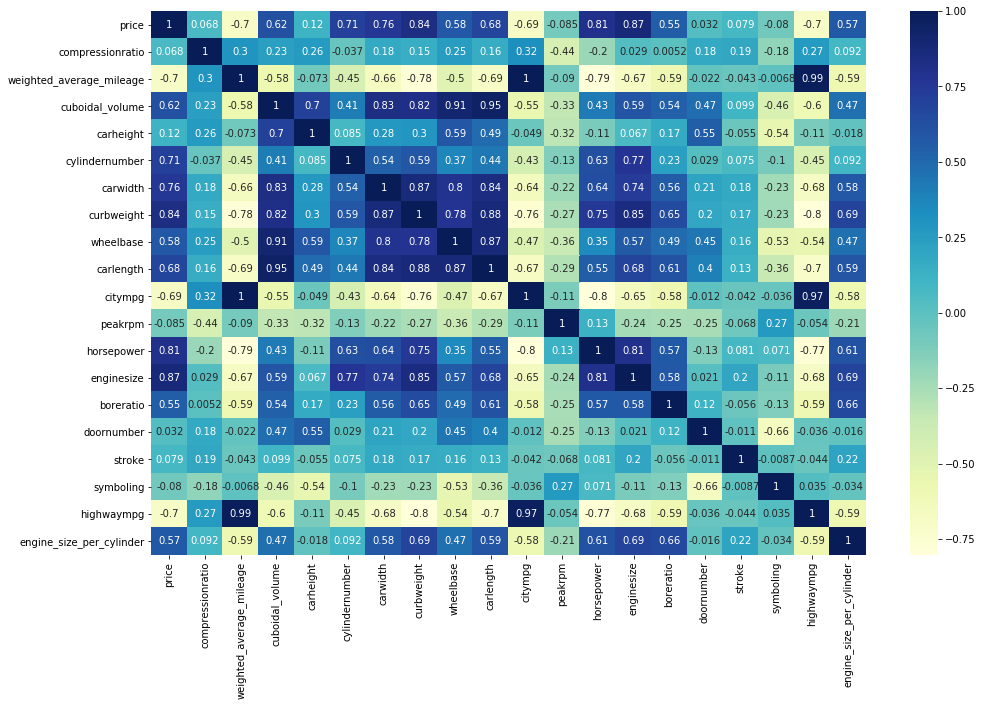

In [314]:
plt.figure(figsize = (16, 10))
sns.heatmap(car_df[['price']+numeric_cols].corr(), annot = True, cmap="YlGnBu")
plt.show()

### Model 0 : Price vs Engine size 

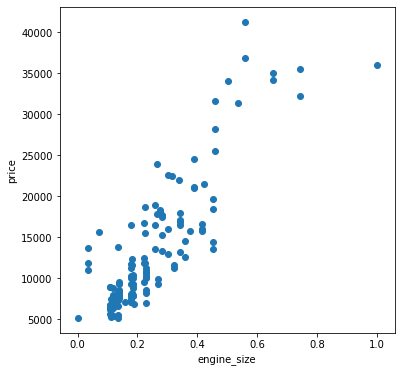

In [315]:
# As enigne size is most correlated with price, trying to build a model with price as dependent and enigne size as predictor
plt.figure(figsize=[6,6])
plt.scatter(df_train.enginesize, df_train.price)
plt.xlabel("engine_size")
plt.ylabel("price")
plt.show()

In [316]:
# x nad y 
y_train = df_train['price']
X_train = df_train.loc[:, df_train.columns != 'price']

In [317]:
# printing x and y
print(y_train.head())
X_train.head()

122     7609.0
125    22018.0
166     9538.0
1      16500.0
199    18950.0
Name: price, dtype: float64


symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
122        0.6         1.0   0.244828   0.426016  0.291667   0.265487   
125        1.0         0.0   0.272414   0.452033  0.666667   0.212389   
166        0.6         0.0   0.272414   0.448780  0.308333   0.424779   
1          1.0         0.0   0.068966   0.450407  0.316667   0.088496   
199        0.2         1.0   0.610345   0.775610  0.575000   0.858407   

     curbweight  cylindernumber  enginesize  boreratio  ...  \
122    0.272692        0.333333    0.139623   0.230159  ...   
125    0.500388        0.333333    0.339623   1.000000  ...   
166    0.314973        0.333333    0.139623   0.444444  ...   
1      0.411171        0.333333    0.260377   0.626984  ...   
199    0.647401        0.333333    0.260377   0.746032  ...   

     company_name_plymouth  company_name_porsche  company_name_renault  \
122                      1                     0                     0   
125                      0                     1                     0   
166                      0                     0                     0   
1                        0                     0                     0   
199                      0                     0                     0   

     company_name_saab  company_name_subaru  company_name_toyota  \
122                  0                    0                    0   
125                  0                    0                    0   
166                  0                    0                    1   
1                    0                    0                    0   
199                  0                    0                    0   

     company_name_volkswagen  company_name_volvo  price_class_elite  \
122                        0                   0                  0   
125                        0                   0                  0   
166                        0                   0                  0   
1                          0                   0                  0   
199                        0                   1                  0   

     price_class_mid  
122                0  
125                1  
166                1  
1                  1  
199                1  

[5 rows x 64 columns]

In [318]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['enginesize']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [319]:
lr.params

const          2479.658045
enginesize    43822.834040
dtype: float64

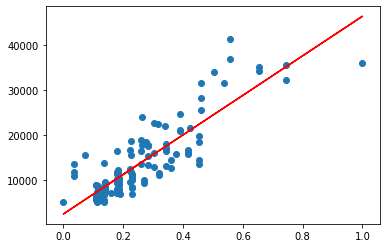

In [320]:
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 2479.66 + 43822.83*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [321]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.09e-44
Time:                        20:49:30   Log-Likelihood:                -1384.0
No. Observations:                 143   AIC:                             2772.
Df Residuals:                     141   BIC:                             2778.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2479.6580    604.784      4.100      0.0

In [322]:
# Model is significant Prob(F-stats) almost 0
# Model's R and Rsquare are similar
# engine size is significant(p<0.05) and  alone can explain 75% of the variance 

## Step 6: Semi - Automated Approach 

Using RFE get 15 predictors supoortedd by RFE then manual elimination

### RFE
Recursive feature elimination

In [323]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [324]:
y_train = df_train['price']
X_train = df_train.loc[:, df_train.columns != 'price']

In [325]:
# printing x and y
print(y_train.head())
X_train.head()

122     7609.0
125    22018.0
166     9538.0
1      16500.0
199    18950.0
Name: price, dtype: float64


symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
122        0.6         1.0   0.244828   0.426016  0.291667   0.265487   
125        1.0         0.0   0.272414   0.452033  0.666667   0.212389   
166        0.6         0.0   0.272414   0.448780  0.308333   0.424779   
1          1.0         0.0   0.068966   0.450407  0.316667   0.088496   
199        0.2         1.0   0.610345   0.775610  0.575000   0.858407   

     curbweight  cylindernumber  enginesize  boreratio  ...  \
122    0.272692        0.333333    0.139623   0.230159  ...   
125    0.500388        0.333333    0.339623   1.000000  ...   
166    0.314973        0.333333    0.139623   0.444444  ...   
1      0.411171        0.333333    0.260377   0.626984  ...   
199    0.647401        0.333333    0.260377   0.746032  ...   

     company_name_plymouth  company_name_porsche  company_name_renault  \
122                      1                     0                     0   
125                      0                     1                     0   
166                      0                     0                     0   
1                        0                     0                     0   
199                      0                     0                     0   

     company_name_saab  company_name_subaru  company_name_toyota  \
122                  0                    0                    0   
125                  0                    0                    0   
166                  0                    0                    1   
1                    0                    0                    0   
199                  0                    0                    0   

     company_name_volkswagen  company_name_volvo  price_class_elite  \
122                        0                   0                  0   
125                        0                   0                  0   
166                        0                   0                  0   
1                          0                   0                  0   
199                        0                   1                  0   

     price_class_mid  
122                0  
125                1  
166                1  
1                  1  
199                1  

[5 rows x 64 columns]

In [326]:
X_train.describe()

symboling  doornumber   wheelbase   carlength    carwidth   carheight  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.559441    0.559441    0.411141    0.525476    0.461655    0.509004   
std      0.239200    0.498199    0.205581    0.204848    0.184517    0.215378   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.400000    0.000000    0.272414    0.399187    0.304167    0.353982   
50%      0.600000    1.000000    0.341379    0.502439    0.425000    0.522124   
75%      0.600000    1.000000    0.503448    0.669919    0.550000    0.668142   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       curbweight  cylindernumber  enginesize   boreratio  ...  \
count  143.000000      143.000000  143.000000  143.000000  ...   
mean     0.407878        0.391608    0.241351    0.497946  ...   
std      0.211269        0.161006    0.154619    0.207140  ...   
min      0.000000        0.000000    0.000000    0.000000  ...   
25%      0.245539        0.333333    0.135849    0.305556  ...   
50%      0.355702        0.333333    0.184906    0.500000  ...   
75%      0.559542        0.333333    0.301887    0.682540  ...   
max      1.000000        1.000000    1.000000    1.000000  ...   

       company_name_plymouth  company_name_porsche  company_name_renault  \
count             143.000000            143.000000            143.000000   
mean                0.027972              0.020979              0.013986   
std                 0.165472              0.143818              0.117845   
min                 0.000000              0.000000              0.000000   
25%                 0.000000              0.000000              0.000000   
50%                 0.000000              0.000000              0.000000   
75%                 0.000000              0.000000              0.000000   
max                 1.000000              1.000000              1.000000   

       company_name_saab  company_name_subaru  company_name_toyota  \
count         143.000000           143.000000           143.000000   
mean            0.020979             0.076923             0.139860   
std             0.143818             0.267406             0.348061   
min             0.000000             0.000000             0.000000   
25%             0.000000             0.000000             0.000000   
50%             0.000000             0.000000             0.000000   
75%             0.000000             0.000000             0.000000   
max             1.000000             1.000000             1.000000   

       company_name_volkswagen  company_name_volvo  price_class_elite  \
count               143.000000          143.000000         143.000000   
mean                  0.048951            0.041958           0.076923   
std                   0.216524            0.201198           0.267406   
min                   0.000000            0.000000           0.000000   
25%                   0.000000            0.000000           0.000000   
50%                   0.000000            0.000000           0.000000   
75%                   0.000000            0.000000           0.000000   
max                   1.000000            1.000000           1.000000   

       price_class_mid  
count       143.000000  
mean          0.594406  
std           0.492733  
min           0.000000  
25%           0.000000  
50%           1.000000  
75%           1.000000  
max           1.000000  

[8 rows x 64 columns]

In [327]:
# Observing all columns are between 0 and 1

In [328]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [329]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 40),
 ('doornumber', False, 37),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 10),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', False, 5),
 ('boreratio', False, 9),
 ('stroke', False, 14),
 ('compressionratio', False, 24),
 ('horsepower', False, 2),
 ('peakrpm', False, 17),
 ('citympg', False, 35),
 ('highwaympg', False, 30),
 ('cuboidal_volume', True, 1),
 ('engine_size_per_cylinder', True, 1),
 ('weighted_average_mileage', False, 23),
 ('fueltype_gas', False, 25),
 ('aspiration_turbo', False, 16),
 ('carbody_hardtop', False, 20),
 ('carbody_hatchback', False, 19),
 ('carbody_sedan', False, 21),
 ('carbody_wagon', False, 22),
 ('drivewheel_fwd', False, 43),
 ('drivewheel_rwd', False, 32),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 26),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 42),
 ('enginetype_ohcf', False, 28),
 ('enginetype_ohcv', False, 38),
 ('eng

In [330]:
rfe_selected_cols = X_train.columns[rfe.support_].tolist()
rfe_selected_cols

['wheelbase',
 'carlength',
 'carwidth',
 'curbweight',
 'cylindernumber',
 'cuboidal_volume',
 'engine_size_per_cylinder',
 'enginelocation_rear',
 'enginetype_l',
 'fuelsystem_4bbl',
 'company_name_bmw',
 'company_name_dodge',
 'company_name_jaguar',
 'company_name_mitsubishi',
 'company_name_peugeot',
 'company_name_plymouth',
 'company_name_renault',
 'company_name_subaru',
 'company_name_toyota',
 'price_class_elite']

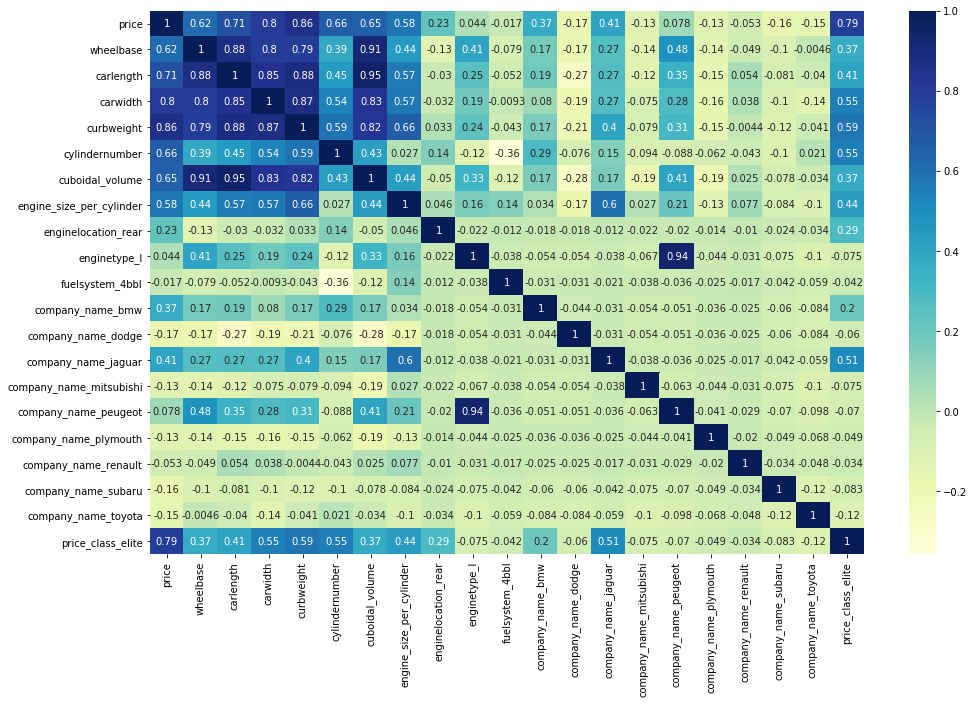

In [331]:
plt.figure(figsize = (16, 10))
sns.heatmap(pd.concat([y_train,X_train[rfe_selected_cols]],axis=1).corr(), annot = True, cmap="YlGnBu")
plt.show()

### Building model using statsmodel, for the detailed statistics

In [332]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [333]:
def prepare_model(X_train_rfe):
    
    # Adding a constant variable 
    X_train_rfe = sm.add_constant(X_train_rfe)
    
     # Running the linear model
    lm = sm.OLS(y_train,X_train_rfe).fit()

    # Summary of our linear model
    print(lm.summary())
    
    # Calculating VIF
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    
    return lm
    

### Model 1 : All RFE selected predictors

In [334]:
# linear model 1 with all the 20 rfe selected columns

# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[rfe_selected_cols]
lm_1 = prepare_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     137.4
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           9.49e-74
Time:                        20:49:35   Log-Likelihood:                -1258.3
No. Observations:                 143   AIC:                             2559.
Df Residuals:                     122   BIC:                             2621.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

<b>Note:</b>

We can see although we have a good Rsquare 0.958 and adjusted Rsquare. There are insignificant coefficients (p value>0.05).
Eliminating one by one in the order of 
    1. high p value, high VIF
    2. high p value, low VIF
    3. low p value, high VIF
    
High p value refers to p value greater than 0.05

High VIF refers to VIF greater than 5 i.e 80% or more variance of that variable is explained by a combination of other variables

In [335]:
# model 2 removing engine_size_per_cylinder (high p value and high VIF)
rfe_eliminated_col_list = list(set(rfe_selected_cols)-set(["engine_size_per_cylinder"]))
X_train_rfe = X_train[rfe_eliminated_col_list]
lm_2 = prepare_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     145.6
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           8.66e-75
Time:                        20:49:35   Log-Likelihood:                -1258.4
No. Observations:                 143   AIC:                             2557.
Df Residuals:                     123   BIC:                             2616.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

In [336]:
# in model 2 high p value is of cylinder number but its VIF is low, hence going to the next highest p value
# model 3 removing carlength
rfe_eliminated_col_list = list(set(rfe_eliminated_col_list)-set(["carlength"]))
X_train_rfe = X_train[rfe_eliminated_col_list]
lm_3 = prepare_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     152.8
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.51e-75
Time:                        20:49:35   Log-Likelihood:                -1259.3
No. Observations:                 143   AIC:                             2557.
Df Residuals:                     124   BIC:                             2613.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

In [337]:
# in model 3 high p value is of cylinder number but its VIF is low, hence going to the next highest p value
# model 4 removing company_name_jaguar
rfe_eliminated_col_list = list(set(rfe_eliminated_col_list)-set(["company_name_jaguar"]))
X_train_rfe = X_train[rfe_eliminated_col_list]
lm_4 = prepare_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     161.6
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.05e-76
Time:                        20:49:36   Log-Likelihood:                -1260.0
No. Observations:                 143   AIC:                             2556.
Df Residuals:                     125   BIC:                             2609.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

In [338]:
# in model 4 high p value is of cylinder number but its VIF is low, hence going to the next highest p value
# same case with fuelsystem_4bbl , so going to the next highest p value
# model 5 removing wheelbase
rfe_eliminated_col_list = list(set(rfe_eliminated_col_list)-set(["wheelbase"]))
X_train_rfe = X_train[rfe_eliminated_col_list]
lm_5 = prepare_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     171.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           3.05e-77
Time:                        20:49:36   Log-Likelihood:                -1260.8
No. Observations:                 143   AIC:                             2556.
Df Residuals:                     126   BIC:                             2606.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

In [339]:
# model 6 removing cylindernumber
rfe_eliminated_col_list = list(set(rfe_eliminated_col_list)-set(["cylindernumber"]))
X_train_rfe = X_train[rfe_eliminated_col_list]
lm_6 = prepare_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     183.3
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.72e-78
Time:                        20:49:36   Log-Likelihood:                -1261.0
No. Observations:                 143   AIC:                             2554.
Df Residuals:                     127   BIC:                             2601.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

In [340]:
# model 7 removing fuelsystem_4bbl
rfe_eliminated_col_list = list(set(rfe_eliminated_col_list)-set(["fuelsystem_4bbl"]))
X_train_rfe = X_train[rfe_eliminated_col_list]
lm_7 = prepare_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.53e-79
Time:                        20:49:37   Log-Likelihood:                -1261.3
No. Observations:                 143   AIC:                             2553.
Df Residuals:                     128   BIC:                             2597.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

In [341]:
# model 8 removing company_name_plymouth
rfe_eliminated_col_list = list(set(rfe_eliminated_col_list)-set(["company_name_plymouth"]))
X_train_rfe = X_train[rfe_eliminated_col_list]
lm_8 = prepare_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     209.9
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           5.27e-80
Time:                        20:49:37   Log-Likelihood:                -1262.6
No. Observations:                 143   AIC:                             2553.
Df Residuals:                     129   BIC:                             2595.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [342]:
# model 9 removing company_name_dodge
rfe_eliminated_col_list = list(set(rfe_eliminated_col_list)-set(["company_name_dodge"]))
X_train_rfe = X_train[rfe_eliminated_col_list]
lm_9 = prepare_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     224.2
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.30e-80
Time:                        20:49:37   Log-Likelihood:                -1264.1
No. Observations:                 143   AIC:                             2554.
Df Residuals:                     130   BIC:                             2593.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [343]:
# In model 9 all the p values are below 0.05, eliminating based on VIF now
# model 10 removing company_name_peugeot based on 9.99 VIF value
rfe_eliminated_col_list = list(set(rfe_eliminated_col_list)-set(["company_name_peugeot"]))
X_train_rfe = X_train[rfe_eliminated_col_list]
lm_10 = prepare_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     217.3
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.01e-78
Time:                        20:49:37   Log-Likelihood:                -1272.6
No. Observations:                 143   AIC:                             2569.
Df Residuals:                     131   BIC:                             2605.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

In [344]:
# There is a drop in Rsquare in the previous model, but it is okay as we have removed some multicollinearity
# model 11 removing cuboidal_volume as it is derived from carwidth (multicollinear)
rfe_eliminated_col_list = list(set(rfe_eliminated_col_list)-set(["cuboidal_volume"]))
X_train_rfe = X_train[rfe_eliminated_col_list]
lm_11 = prepare_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     203.8
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           4.04e-75
Time:                        20:49:37   Log-Likelihood:                -1283.9
No. Observations:                 143   AIC:                             2590.
Df Residuals:                     132   BIC:                             2622.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

In [345]:
print(X_train[rfe_eliminated_col_list].shape)
rfe_eliminated_col_list

(143, 10)


['company_name_mitsubishi',
 'company_name_renault',
 'enginetype_l',
 'enginelocation_rear',
 'company_name_subaru',
 'company_name_toyota',
 'company_name_bmw',
 'carwidth',
 'price_class_elite',
 'curbweight']

In [346]:
# There is a drop in Rsquare in the previous model, but it is okay as we have removed some multicollinearity
# model 12 removing curbweight
rfe_eliminated_col_list12 = list(set(rfe_eliminated_col_list)-set(["curbweight"]))
X_train_rfe = X_train[rfe_eliminated_col_list12]
lm_12 = prepare_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     126.0
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.27e-60
Time:                        20:49:38   Log-Likelihood:                -1322.9
No. Observations:                 143   AIC:                             2666.
Df Residuals:                     133   BIC:                             2695.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [347]:
# There is a drop in Rsquare in the previous model, but it is okay as we have removed some multicollinearity
# model 12.1 removing company_name_toyota
rfe_eliminated_col_list12 = list(set(rfe_eliminated_col_list)-set(["company_name_toyota"]))
X_train_rfe = X_train[rfe_eliminated_col_list12]
lm_121 = prepare_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     210.5
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           3.83e-74
Time:                        20:49:38   Log-Likelihood:                -1289.3
No. Observations:                 143   AIC:                             2599.
Df Residuals:                     133   BIC:                             2628.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [348]:
rfe_eliminated_col_list12

['company_name_mitsubishi',
 'company_name_renault',
 'enginetype_l',
 'enginelocation_rear',
 'company_name_subaru',
 'company_name_bmw',
 'carwidth',
 'price_class_elite',
 'curbweight']

<b> Summary: </b>

After choosing 20 columns from RFE, and manually eliminating most columns step by step:

Finalized two models :

<b> Model 11</b> having features
: 'company_name_mitsubishi',
 'carwidth',
 'company_name_toyota',
 'company_name_renault',
 'company_name_bmw',
 'enginetype_l',
 'price_class_elite',
 'curbweight',
 'enginelocation_rear',
 'company_name_subaru'
 
    R-squared:                       0.939
    Adj. R-squared:                  0.935
    Prob (F-statistic):           4.04e-75



<b>   Model 12.1</b> having features 
: 'company_name_mitsubishi',
 'carwidth',
 'company_name_renault',
 'company_name_bmw',
 'enginetype_l',
 'price_class_elite',
 'curbweight',
 'enginelocation_rear',
 'company_name_subaru'


    R-squared:                       0.934
    Adj. R-squared:                  0.930
    Prob (F-statistic):           3.83e-74
 


In [349]:
# Difference being the curb weight and company_name_toyota. Let's compare them on 

## Step 7: Residual Analysis of the train data

In [350]:
def residual_analysis(lm, feature_cols, test=False):
    X_train_lm = sm.add_constant(X_train[feature_cols])
    y_train_pred = lm.predict(X_train_lm)
    
    residuals = y_train - y_train_pred
    
    # Plot the histogram of the error terms
    if test:
        f, (ax1, ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,3), dpi=90)
    else:
        f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)

    sns.distplot(residuals, bins = 20, ax=ax1) 
    ax1.title.set_text('Distribution of error terms') 
    plt.xlabel('Errors', fontsize = 12)
    
    sns.scatterplot(y=residuals,x = y_train_pred, ax=ax2)
    ax2.title.set_text('Error terms vs Y pred')                   # Plot heading 
    plt.xlabel('y predicted', fontsize = 12)
    plt.ylabel('error terms', fontsize = 12)
    
    if test:
        sns.scatterplot(y=y_train_pred,x=y_train, ax=ax3)
        ax3.title.set_text('Y pred vs Y actual')                # Plot heading 
        plt.xlabel('y actual', fontsize = 12)
        plt.ylabel('y pred', fontsize = 12)
    
    plt.tight_layout()

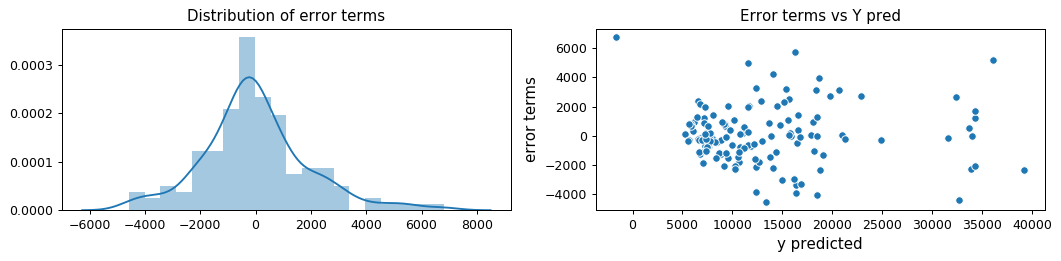

In [351]:
# model 11
residual_analysis(lm_11, rfe_eliminated_col_list)

<b>Note:</b> Assumptions are true
    - error terms have normal distribution
    - error terms are independent(scatter plot)

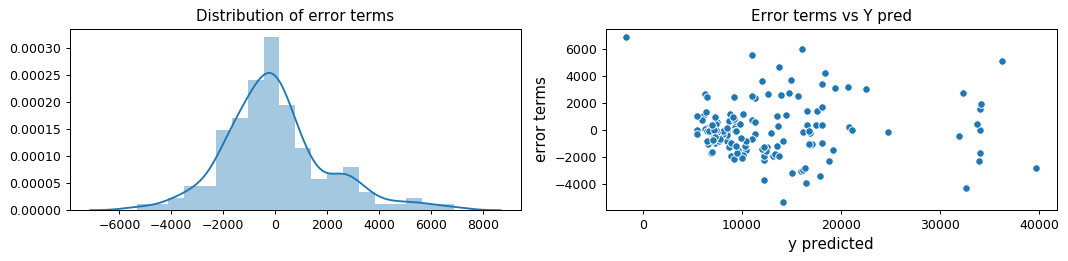

In [352]:
# model 12.1
residual_analysis(lm_121, rfe_eliminated_col_list12)

<b>Note:</b> Assumptions are true
    - error terms have normal distribution
    - error terms are independent(scatter plot)

## Step 8: Making Predictions Using the Final Models (model 11 and 12.1)


In [353]:
df_test.loc[:,numeric_cols] = scaler.transform(df_test[numeric_cols])

C:\Users\barkha.saxena\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Text(0, 0.5, 'y_pred')

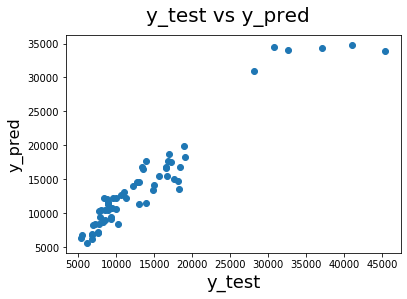

In [354]:
fig = plt.figure()
plt.scatter(y_test, y_pred_121)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [355]:
def predict_on_test(lm, feature_cols):
    #scaling only the numeric columns
    
    y_test = df_test['price']
    X_test = df_test[feature_cols]
    
    # adding constant
    X_test_lm = sm.add_constant(X_test)
    
    y_pred = lm.predict(X_test_lm)
    
    return y_pred
    
    
    

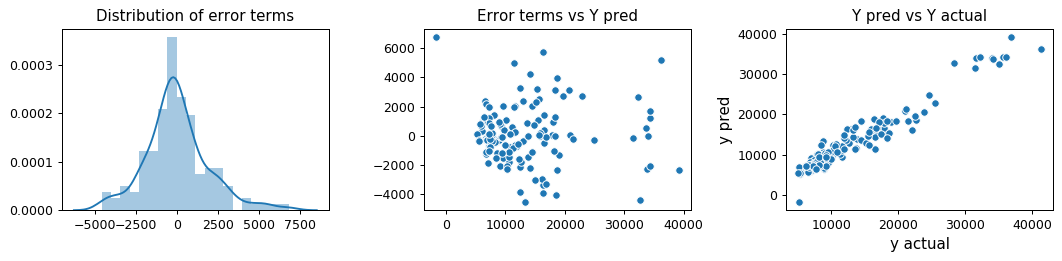

In [356]:
y_pred_11 = predict_on_test(lm_11, rfe_eliminated_col_list)
residual_analysis(lm_11,rfe_eliminated_col_list, test=True)

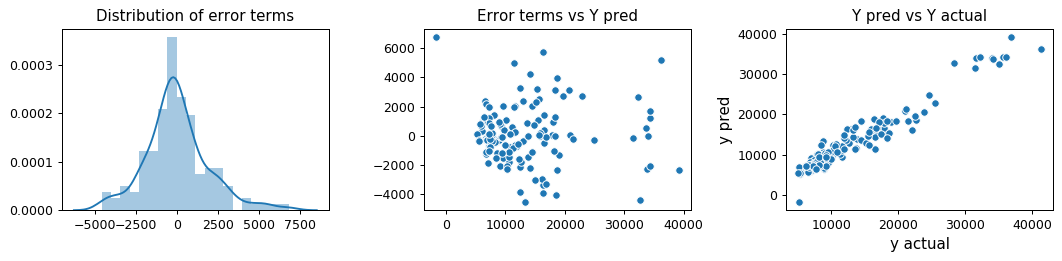

In [357]:
y_pred_121 = predict_on_test(lm_121, rfe_eliminated_col_list12)
residual_analysis(lm_11,rfe_eliminated_col_list, test=True)

# R2 Score

In [358]:
from sklearn.metrics import r2_score 

In [359]:
score_11 = r2_score(y_test, y_pred_11)
print(f"The R2 score for model 11 is {score_11}")

The R2 score for model 11 is 0.9066985263689613


In [360]:
score_121 = r2_score(y_test, y_pred_121)
print(f"The R2 score for model 12.1 is {score_121}")

The R2 score for model 12.1 is 0.905781840971998


# Result

In [361]:
# Comparing the two models

def print_model_result(lm,model_num,score):
    print(f"******************Results for Model {model_num}*******************************")
    print( "\nRsquared: "+ str(lm.rsquared))
    print("Adjusted Rsq: " +str(lm.rsquared_adj))
    print("Prob(f-stats): "+str(lm.f_pvalue))
    print("\nEquation :")
    const = round(lm.params["const"],2)
    eqn = f"car_price = {const} "
    for feature,coef in zip(lm.params.index, lm.params.values):
        if feature != "const":
            eqn = "\n  +  ".join([eqn, f"({round(coef,2)}) * {feature}"])
    print(eqn[:])
    
    print(f"\n R2 Score on Test: {score}")


    


In [362]:
print_model_result(lm_11,11,score_11)

******************Results for Model 11*******************************

Rsquared: 0.9391704632151584
Adjusted Rsq: 0.9345621649738826
Prob(f-stats): 4.0414370389582366e-75

Equation :
car_price = 1398.86 
  +  (-2132.41) * company_name_mitsubishi
  +  (-3579.6) * company_name_renault
  +  (-3050.64) * enginetype_l
  +  (12143.97) * enginelocation_rear
  +  (-2076.81) * company_name_subaru
  +  (-1654.34) * company_name_toyota
  +  (7772.81) * company_name_bmw
  +  (9023.46) * carwidth
  +  (8252.58) * price_class_elite
  +  (17684.92) * curbweight

 R2 Score on Test: 0.9066985263689613


<b>Conclusion:</b>

    Model 11 shows good results,
    - explains 93% variance in car_price
    - model is significant (prob(f-stats))< 0.05
    - Rsq and Adj Rsq are similar
    - has significant features(p-value of features < 0.05)
    - independent features (VIF <5.2, taking aorund 5 as benchmark (as told in lectures))
    
    - R2 score on test data = 0.9066

---
                                                         End of Assignment
---